<a href="https://colab.research.google.com/github/henriquebarretto/IowaHousingDataset/blob/main/Analysis_of_the_Ames%2C_Iowa_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 Analysis of the Ames, Iowa Housing Dataset

**Autors:** Henrique Sá Barretto de Oliveira e Pedro Martins de Oliveira Menezes

**Data:** Outubro de 2025  
**Instituição/Disciplina:** Universidade SENAI CIMATEC, Projeto da segunda unidade da disciplina Inteligência Computacional, ministrada por José Grimaldo Silva, Ph.D.  
**Descrição:**  
Este notebook apresenta uma análise detalhada do *Ames Housing Dataset*, um conjunto de dados amplamente utilizado para estudos de modelagem preditiva e regressão.  
O objetivo é compreender os principais fatores que influenciam o preço de venda (**SalePrice**) dos imóveis na cidade de Ames (Iowa, EUA), explorando relações entre variáveis numéricas e categóricas por meio de técnicas estatísticas e visuais.

A análise inclui:
- **Inspeção e tratamento dos dados brutos**, garantindo qualidade e consistência;  
- **Exploração estatística e visual** das variáveis mais relevantes;  
- **Análise de correlação** entre atributos estruturais e o valor final dos imóveis;  
- Identificação de **padrões característicos de diferentes perfis de propriedade**;  
- Geração de **insights interpretáveis** que auxiliam na compreensão do comportamento do mercado imobiliário local.

## 1 CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÕES
Importação de bibliotecas necessárias para análise de dados, visualização e estatísticas. Configurações iniciais para garantir reprodutibilidade.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

# Configurações de visualização para melhor clareza dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Montar conexão com google drive
#drive.mount('/content/drive')

## 2 CARREGAMENTO E INSPEÇÃO INICIAL DOS DADOS
Carregamento do dataset de Iowa. Inspeção inicial para entender estrutura, dimensões e qualidade dos dados. Este dataset já esta dividido em teste e treino.


Problema 1: A divisão prévia pode causar enviesamento por overfitting no modelo. O que vai causar a diferença nos resultados serão as diferentes abordagens (árvore, regressão, etc) e não o split dos dados.

In [ ]:
# Carregamento
## Trocar caminho depois do /content/drive/MyDrive/ para que seja referente ao
## local do arquivo em seu drive

#df_train = pd.read_csv('/content/drive/MyDrive/2025.2/Intelicomp/italia/train.csv')
df_train = pd.read_csv('/content/train.csv')

# Visualização do formato do dataframe
print(f"✅ DATASET CARREGADO. TREINO: {df_train.shape[0]} linhas × {df_train.shape[1]} colunas")

✅ DATASET CARREGADO. TREINO: 1460 linhas × 81 colunas


In [ ]:
# Inspeção detalhada da estrutura do dataset
print("\n🔍 INSPEÇÃO INICIAL DO DATASET IOWA")

print("\n📋 PRIMEIRAS LINHAS (amostra da estrutura):")
display(df_train.head(5))

print("\n🏷️  COLUNAS PRINCIPAIS E TIPOS DE DADOS:")
print(df_train.info())


🔍 INSPEÇÃO INICIAL DO DATASET IOWA

📋 PRIMEIRAS LINHAS (amostra da estrutura):


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



🏷️  COLUNAS PRINCIPAIS E TIPOS DE DADOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

Tipos das variáveis:
* Ordinal: MSSubClass, LotShape, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence
* Nominal: ID. MSZoning, Street, Alley, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, YearBuilt, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Eletrical, GarageType, GarageYrBlt, MiscFeature, MoSold, YrSold, SaleType, SaleCondition
* Intervalar: N/A
* Razão: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EncolsedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, SalePrice

Variável *target*: **SalePrice**


In [ ]:
print("\n📊 ANÁLISE DOS DADOS BRUTOS:")
print("\n📊 VARIÁVEIS NUMÉRICAS:")
display(df_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath']].describe().round(2))


📊 ANÁLISE DOS DADOS BRUTOS:

📊 VARIÁVEIS NUMÉRICAS:


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath
count,1201.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,70.05,10516.83,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06
std,24.28,9981.26,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24
min,21.00,1300.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00
25%,59.00,7553.50,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00
50%,69.00,9478.50,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00
75%,80.00,11601.50,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00
max,313.00,215245.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00


In [ ]:
display(df_train[['FullBath','HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe().round(2))

,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,1.57,0.38,6.52,0.61,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49
std,0.55,0.50,1.63,0.64,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12
min,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,5.00,0.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,6.00,1.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,1.00,7.00,1.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00
max,3.00,2.00,14.00,3.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00


In [ ]:
display(df_train['SalePrice'].describe().round(2))

,SalePrice
count,1460.0
mean,180921.2
std,79442.5
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


In [ ]:
print("\n🎯 VARIÁVEIS CATEGÓRICAS NOMINAIS:")
categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Eletrical', 'GarageType', 'GarageYrBlt', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
for col in categorical_cols:
   if col in df_train.columns:
      print(f"   • {col}: {df_train[col].unique()}")


🎯 VARIÁVEIS CATEGÓRICAS NOMINAIS:
   • MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
   • MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
   • Street: ['Pave' 'Grvl']
   • Alley: [nan 'Grvl' 'Pave']
   • LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
   • Utilities: ['AllPub' 'NoSeWa']
   • LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
   • Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
   • Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
   • Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
   • BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
   • HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
   • YearBuilt: [2003 1976 2001 1915 2000 1993 2004 1973 1931 19

O ID não foi incluido acima, pois é apenas um valor incrementado de 1 a 1460 com passo 1

In [ ]:
print("\n🎯 VARIÁVEIS CATEGÓRICAS ORDINAIS:")
categorical_cols = [ 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
for col in categorical_cols:
   if col in df_train.columns:
      print(f"   • {col}: {df_train[col].unique()}")


🎯 VARIÁVEIS CATEGÓRICAS ORDINAIS:
   • LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
   • LandSlope: ['Gtl' 'Mod' 'Sev']
   • OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
   • OverallCond: [5 8 6 7 4 2 3 9 1]
   • ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
   • ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
   • BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
   • BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
   • BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
   • BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
   • BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
   • HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
   • KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
   • Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
   • FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
   • GarageFinish: ['RFn' 'Unf' 'Fin' nan]
   • GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
   • GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
   • PavedDrive: ['Y' 'N' 'P']
   • PoolQC: [nan 'Ex' 'Fa' 'Gd']
   • Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


MSSubClass é o atributo que indica o tipo de imóvel que foi vendido. Apesar de ser mostrado acima com valores númericos, a documentação do dataset indica o que significa cada um desses valores, portanto, é necessário fazer a substituição desses valores em prol da interpretabilidade.

In [ ]:
df_train['MSSubClass']=df_train['MSSubClass'].astype(object)
df_train['MSSubClass']=df_train['MSSubClass'].replace([20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190], ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES', '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL', 'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES', '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES'])
print(df_train["MSSubClass"].unique())

['2-STORY 1946 & NEWER' '1-STORY 1946 & NEWER ALL STYLES'
 '2-STORY 1945 & OLDER' '1-1/2 STORY FINISHED ALL AGES'
 '2 FAMILY CONVERSION - ALL STYLES AND AGES'
 '1-1/2 STORY - UNFINISHED ALL AGES' 'DUPLEX - ALL STYLES AND AGES'
 '1-STORY PUD - 1946 & NEWER' '1-STORY 1945 & OLDER' 'SPLIT FOYER'
 'SPLIT OR MULTI-LEVEL' '2-STORY PUD - 1946 & NEWER'
 '2-1/2 STORY ALL AGES' 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
 '1-STORY W/FINISHED ATTIC ALL AGES']


### 2.1 Análise Geral

Análise Geral (simples):

- Qual é o preço médio dos imóveis no conjunto de dados?
- Qual é a distribuição dos tipos de propriedades (ex: apartamentos, casas, coberturas)?
- Quantas propriedades estão listadas para venda e em quais cidades?

Características das Propriedades (simples):

- Qual é o número médio de quartos e banheiros dos imóveis listados?
- Como o tamanho da propriedade varia entre diferentes tipos e localizações?

-----------------------------------------------------------------------------

#### 2.1.1 Qual é o preço médio dos imóveis no conjunto de dados?

Valor médio do imóvel no dataset: 180921.2 USD.


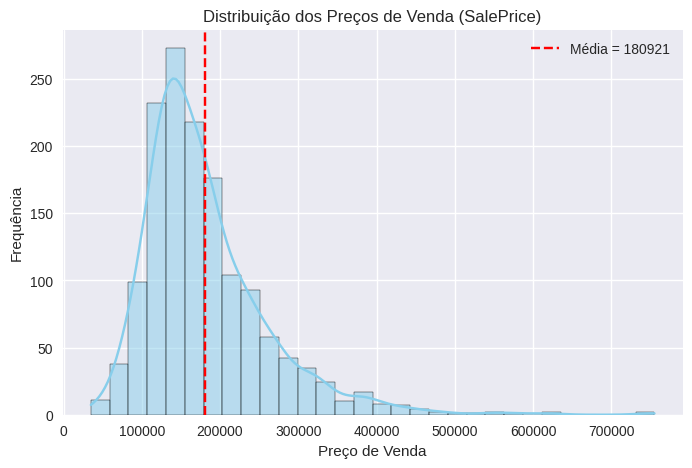

In [ ]:
print(f"Valor médio do imóvel no dataset: {round(df_train['SalePrice'].mean(), 2)} USD.")

plt.figure(figsize=(8,5))
sns.histplot(df_train['SalePrice'], bins=30, kde=True, color='skyblue')
plt.axvline(df_train['SalePrice'].mean(), color='red', linestyle='--', label=f"Média = {df_train['SalePrice'].mean():.0f}")
plt.title('Distribuição dos Preços de Venda (SalePrice)')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Não há indicativo da moeda utilizada, pois SalePrice não está descrito na documentação do dataset, mas, como MiscValues está indicada como documentação como $, assume-se que os valores de SalePrice estão, também, em dolares.

#### 2.1.2 Qual a distribuição do tipo de propriedade?

   • 1-STORY 1946 & NEWER ALL STYLES: 0.367 (36.7%)
   • 2-STORY 1946 & NEWER: 0.205 (20.5%)
   • 1-1/2 STORY FINISHED ALL AGES: 0.099 (9.9%)
   • 1-STORY PUD - 1946 & NEWER: 0.060 (6.0%)
   • 1-STORY 1945 & OLDER: 0.047 (4.7%)
   • 2-STORY PUD - 1946 & NEWER: 0.043 (4.3%)
   • 2-STORY 1945 & OLDER: 0.041 (4.1%)
   • SPLIT OR MULTI-LEVEL: 0.040 (4.0%)
   • DUPLEX - ALL STYLES AND AGES: 0.036 (3.6%)
   • 2 FAMILY CONVERSION - ALL STYLES AND AGES: 0.021 (2.1%)
   • SPLIT FOYER: 0.014 (1.4%)
   • 2-1/2 STORY ALL AGES: 0.011 (1.1%)
   • 1-1/2 STORY - UNFINISHED ALL AGES: 0.008 (0.8%)
   • PUD - MULTILEVEL - INCL SPLIT LEV/FOYER: 0.007 (0.7%)
   • 1-STORY W/FINISHED ATTIC ALL AGES: 0.003 (0.3%)


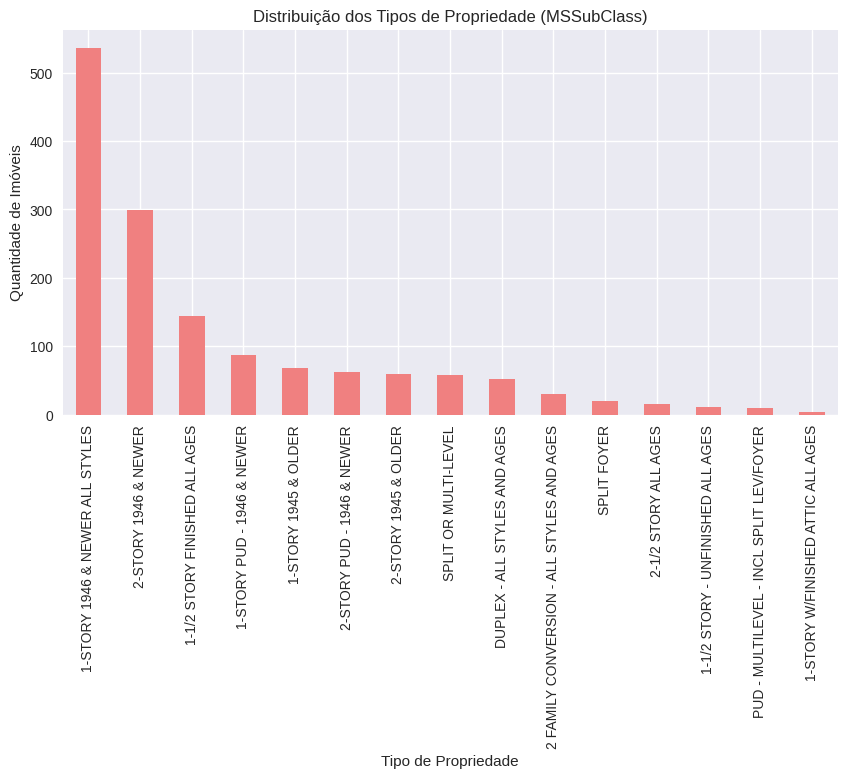

In [ ]:
distribuicao_propriedade= df_train['MSSubClass'].value_counts(normalize=True)
for htype, prop in distribuicao_propriedade.items():
    print(f"   • {htype}: {prop:.3f} ({distribuicao_propriedade[htype]*100:.1f}%)")

plt.figure(figsize=(10,5))
df_train['MSSubClass'].value_counts().sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Distribuição dos Tipos de Propriedade (MSSubClass)')
plt.xlabel('Tipo de Propriedade')
plt.ylabel('Quantidade de Imóveis')
plt.show()

#### 2.1.3 Quantas propriedades estão a venda e em quais bairros?

   • NAmes: 225
   • CollgCr: 150
   • OldTown: 113
   • Edwards: 100
   • Somerst: 86
   • Gilbert: 79
   • NridgHt: 77
   • Sawyer: 74
   • NWAmes: 73
   • SawyerW: 59
   • BrkSide: 58
   • Crawfor: 51
   • Mitchel: 49
   • NoRidge: 41
   • Timber: 38
   • IDOTRR: 37
   • ClearCr: 28
   • SWISU: 25
   • StoneBr: 25
   • Blmngtn: 17
   • MeadowV: 17
   • BrDale: 16
   • Veenker: 11
   • NPkVill: 9
   • Blueste: 2


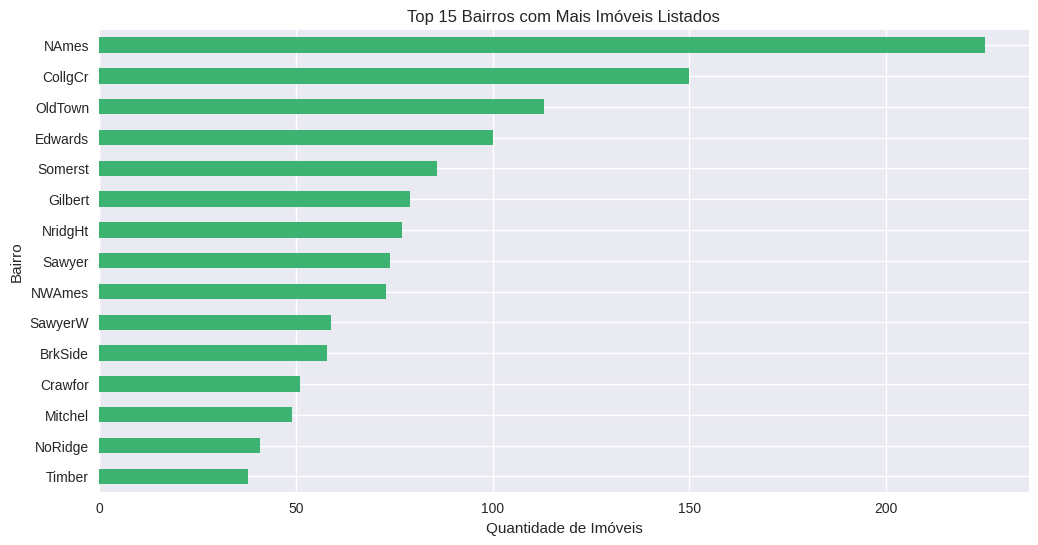

In [ ]:
distribuicao_cidades= df_train['Neighborhood'].value_counts()
for cidade, prop in distribuicao_cidades.items():
    print(f"   • {cidade}: {prop:}")

plt.figure(figsize=(12,6))
df_train['Neighborhood'].value_counts().head(15).plot(kind='barh', color='mediumseagreen')
plt.title('Top 15 Bairros com Mais Imóveis Listados')
plt.xlabel('Quantidade de Imóveis')
plt.ylabel('Bairro')
plt.gca().invert_yaxis()
plt.show()

#### 2.1.4 Qual o número médio de quartos e banheiros dos imóveis listados?

Número médio de quartos por imovel no dataset é de 2 a 3 quartos
Número médio de banheiros por imovel no dataset é de 2 a 3 banheiros (considerando os 'meios' como 0.5).


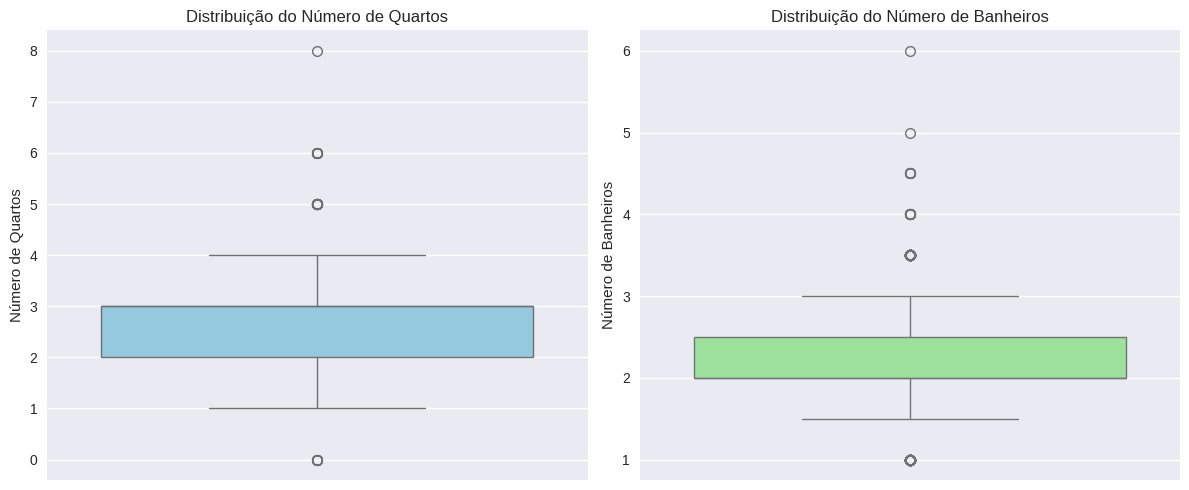

In [ ]:
df_train['TotalBaths'] = (
    df_train['FullBath'] +
    (0.5 * df_train['HalfBath']) +
    df_train['BsmtFullBath'] +
    (0.5 * df_train['BsmtHalfBath'])
)

print(f"Número médio de quartos por imovel no dataset é de {math.floor(df_train['BedroomAbvGr'].mean())} a {math.ceil(df_train['BedroomAbvGr'].mean())} quartos")
print(f"Número médio de banheiros por imovel no dataset é de {math.floor(df_train['TotalBaths'].mean())} a {math.ceil(df_train['TotalBaths'].mean())} banheiros (considerando os 'meios' como 0.5).")

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(ax=axes[0], y=df_train['BedroomAbvGr'], color='skyblue')
axes[0].set_title('Distribuição do Número de Quartos')
axes[0].set_ylabel('Número de Quartos')
sns.boxplot(ax=axes[1], y=df_train['TotalBaths'], color='lightgreen')
axes[1].set_title('Distribuição do Número de Banheiros')
axes[1].set_ylabel('Número de Banheiros')

plt.tight_layout()
plt.show()


#### 2.1.5 Como o tamanho da propriedade varia entre diferentes tipos e localizações?

In [ ]:
print("Por tipo de casa:")
types = df_train['MSSubClass'].unique()
for type in types:
 df_casa = df_train.loc[(df_train['MSSubClass'] == type)]
 print(f'• {type}:')
 print(f'Média de tamanho: {round(df_casa['LotArea'].mean(),2)} sqft, com desvio padrão {round(df_casa['LotArea'].std(),2)}')
 print("=============================================================================")

Por tipo de casa:
• 2-STORY 1946 & NEWER:
Média de tamanho: 12058.08 sqft, com desvio padrão 6415.47
• 1-STORY 1946 & NEWER ALL STYLES:
Média de tamanho: 11755.51 sqft, com desvio padrão 11402.85
• 2-STORY 1945 & OLDER:
Média de tamanho: 10120.17 sqft, com desvio padrão 4132.39
• 1-1/2 STORY FINISHED ALL AGES:
Média de tamanho: 10479.15 sqft, com desvio padrão 13248.22
• 2 FAMILY CONVERSION - ALL STYLES AND AGES:
Média de tamanho: 16111.23 sqft, com desvio padrão 28833.08
• 1-1/2 STORY - UNFINISHED ALL AGES:
Média de tamanho: 6949.0 sqft, com desvio padrão 1904.23
• DUPLEX - ALL STYLES AND AGES:
Média de tamanho: 9720.06 sqft, com desvio padrão 3146.83
• 1-STORY PUD - 1946 & NEWER:
Média de tamanho: 5383.95 sqft, com desvio padrão 2175.8
• 1-STORY 1945 & OLDER:
Média de tamanho: 7888.49 sqft, com desvio padrão 3441.14
• SPLIT FOYER:
Média de tamanho: 9317.45 sqft, com desvio padrão 2243.8
• SPLIT OR MULTI-LEVEL:
Média de tamanho: 10895.48 sqft, com desvio padrão 3101.19
• 2-STORY PUD -

In [ ]:
print("Por bairro:")
places = df_train['Neighborhood'].unique()
for place in places:
 df_local = df_train.loc[(df_train['Neighborhood'] == place)]
 print(f'• {place}:')
 print(f'Média de tamanho: {round(df_local['LotArea'].mean(),2)} sqft, com desvio padrão {round(df_local['LotArea'].std(),2)}')
 print("=============================================================================")

Por bairro:
• CollgCr:
Média de tamanho: 9619.15 sqft, com desvio padrão 2344.78
• Veenker:
Média de tamanho: 15606.0 sqft, com desvio padrão 11832.67
• Crawfor:
Média de tamanho: 11809.69 sqft, com desvio padrão 5315.34
• NoRidge:
Média de tamanho: 14218.9 sqft, com desvio padrão 7332.63
• Mitchel:
Média de tamanho: 11624.29 sqft, com desvio padrão 6025.81
• Somerst:
Média de tamanho: 7840.87 sqft, com desvio padrão 3742.98
• NWAmes:
Média de tamanho: 11833.63 sqft, com desvio padrão 2683.0
• OldTown:
Média de tamanho: 8207.06 sqft, com desvio padrão 3235.48
• BrkSide:
Média de tamanho: 7360.41 sqft, com desvio padrão 2714.36
• Sawyer:
Média de tamanho: 10459.28 sqft, com desvio padrão 3456.19
• NridgHt:
Média de tamanho: 10887.95 sqft, com desvio padrão 3637.95
• NAmes:
Média de tamanho: 10139.92 sqft, com desvio padrão 3250.14
• SawyerW:
Média de tamanho: 9923.8 sqft, com desvio padrão 2262.59
• IDOTRR:
Média de tamanho: 8109.16 sqft, com desvio padrão 2546.61
• MeadowV:
Média de ta

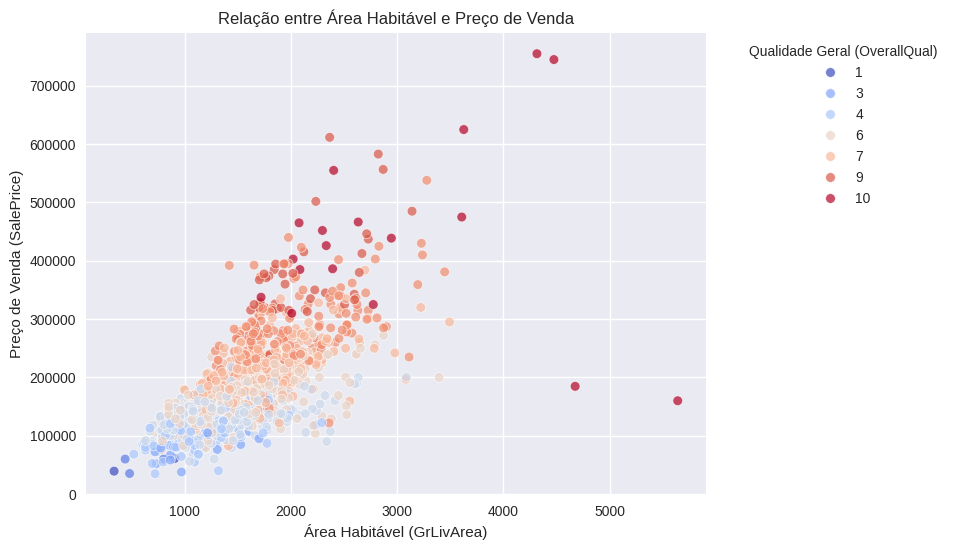

In [ ]:
# Como o tamanho da propriedade varia entre tipos e localizações?
# Relação entre área e preço
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='coolwarm', alpha=0.7)
plt.title('Relação entre Área Habitável e Preço de Venda')
plt.xlabel('Área Habitável (GrLivArea)')
plt.ylabel('Preço de Venda (SalePrice)')
plt.legend(title='Qualidade Geral (OverallQual)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

-- Insights
- Tendência clara de que quanto maior a área, maior o preço, mas o nível de qualidade também influencia.
- Casas pequenas com alta qualidade podem valer mais que grandes de baixa qualidade.
- Podemos observar outliers.
------------------------------------------------------------------------

Com as características do dataset vistas até então, eliminam-se os seguintes atributos:
* **ID: Identificador dos registros, não deve ser usado nas predições;**
* MSZoning: Julgado não relevante pelo grupo;
* Street: Julgado não relevante pelo grupo;
* LandCountour: Julgado não relevante pelo grupo;
* LotConfig: Julgado não relevante pelo grupo;
* LandSlope: Julgado não relevante pelo grupo;
* Condition1: Julgado não relevante pelo grupo;
* Condition 2: Julgado não relevante pelo grupo;
* **BldgType e HouseStyle: Julgados redundantes com o atributo que descreve o tipo de casa;**
* **OverallCond: Julgado redundante com OverallQual;**
* RoofStyle: Julgado não relevante pelo grupo;
* RoofMatl: Julgado não relevante pelo grupo;
* Exterior1st: Julgado não relevante pelo grupo;
* Exterior2nd: Julgado não relevante pelo grupo;
* **ExterCond: Julgado redundante com ExterQual;**
* Foundation: Julgado não relevante pelo grupo;
* BsmtExposure: Julgado não relevante pelo grupo;
* BsmtFinType1: Julgado não relevante pelo grupo;
* **BsmtFinSF1: Julgado redundante. Este atributo somado com BsmtFinSF2 e BsmtUnfSF resulta em TotalBsmtSF;**
* BsmtFinType2: Julgado não relevante pelo grupo;
* **BsmtFinSF2: Julgado redundante. Este atributo somado com BsmtFinSF1 e BsmtUnfSF resulta em TotalBsmtSF;**
* **BsmtUnfSF: Julgado redundante. Este atributo somado com BsmtFinSF1 e BsmtFinSF2 resulta em TotalBsmtSF;**
* **1stFlrSF: Julgado redundante. Este atributo somado com 2ndFlrSF e LowQualFinSF resulta em GrLivArea**
* **2ndFlrSF: Julgado redundante. Este atributo somado com 1stFlrSF e LowQualFinSF resulta em GrLivArea**
* **LowQualFinSF: Julgado redundante. Este atributo somado com 1stFlrSF e 2ndFlrSF resulta em GrLivArea**
* GarageYrBlt: Julgado não relevante pelo grupo;
* GarageFinish: Julgado não relevante pelo grupo;
* **GarageCars: Julgado redundante com GarageArea;**
* **GarageCond: Julgado redundante com GarageQual;**
* PavedDrive: Julgado não relevante pelo grupo;
* MoSold: Julgado não relevante pelo grupo;
* YrSold: Julgado não relevante pelo grupo;
* SaleType : Julgado não relevante pelo grupo;
* SaleCondition: Julgado não relevante pelo grupo;


In [ ]:
df_train_pp=df_train.drop(columns=['Id', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond' , 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinType2', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'])
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   YearBuilt      1460 non-null   int64  
 9   YearRemodAdd   1460 non-null   int64  
 10  MasVnrType     588 non-null    object 
 11  MasVnrArea     1452 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  BsmtQual       1423 non-null   object 
 14  BsmtCond       1423 non-null   object 
 15  TotalBsmtSF    1460 non-null   int64  
 16  Heating        1460 non-null   object 
 17  HeatingQC      1460 non-null   object 
 18  CentralA

Por fim, o atributo OverallQual também deve ter seus valores ajustados, por não se tratar de um atributo numérico.

In [ ]:
df_train_pp['OverallQual']=df_train_pp['OverallQual'].astype(object)
df_train_pp['OverallQual']=df_train_pp['OverallQual'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent'])
print(df_train_pp['OverallQual'].unique())
df_train_pp.info()

['Good' 'Above Average' 'Very Good' 'Average' 'Excellent' 'Below Average'
 'Very Excellent' 'Fair' 'Very Poor' 'Poor']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   OverallQual    1460 non-null   object 
 8   YearBuilt      1460 non-null   int64  
 9   YearRemodAdd   1460 non-null   int64  
 10  MasVnrType     588 non-null    object 
 11  MasVnrArea     1452 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  BsmtQual       1423 non-null   object 
 14  BsmtCond       1423 non-null   object 
 15  TotalBsmtSF    1460 n

#3 ANÁLISE DOS ATRIBUTOS RESTANTES QUANTO A REGISTROS NULOS E CLASSES NUMÉRICAS SEMELHANTES

Com os atributos prelimiarmente excluidos, é necessário tratar os valores NaN dos restantes. Alguns desses valores tem signficado apontado na documentação do dataset. Outros será necessário decidir sobre a estratégia de imputação.

##3.1 LotFrontage
Atributo que é referente à quantidade frente de rua (medido em *feet*) do imóvel. Lotes com maior frente de rua são mais valorizados.

In [ ]:
df_train_pp['LotFrontage'].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


Analisa-se a mediana da distribuição por bairro, pois os loteamentos em casa bairro seguem valores padrões. Em bairros mais planejados, por exemplo, os lotes tendem a ser maiores. Usar a mediana traria valores menos sensíveis a outliers, resultando numa imputação mais precisa. Antes da susbtituição, analisa-se média e mediana por bairro:

In [ ]:
bairros = df_train_pp['Neighborhood'].unique()
for bairro in bairros:
 df_bairro_front = df_train_pp.loc[(df_train_pp['Neighborhood'] == bairro)]
 print(f'• {bairro}:')
 print(f'Mediana de tamanho da frente de rua: {df_bairro_front['LotFrontage'].median()} ft')
 print(f'Media de tamanho da frente de rua: {df_bairro_front['LotFrontage'].mean().round(2)} ft')
 print("=============================================================================")

• CollgCr:
Mediana de tamanho da frente de rua: 70.0 ft
Media de tamanho da frente de rua: 71.68 ft
• Veenker:
Mediana de tamanho da frente de rua: 68.0 ft
Media de tamanho da frente de rua: 59.71 ft
• Crawfor:
Mediana de tamanho da frente de rua: 74.0 ft
Media de tamanho da frente de rua: 71.8 ft
• NoRidge:
Mediana de tamanho da frente de rua: 91.0 ft
Media de tamanho da frente de rua: 91.88 ft
• Mitchel:
Mediana de tamanho da frente de rua: 73.0 ft
Media de tamanho da frente de rua: 70.08 ft
• Somerst:
Mediana de tamanho da frente de rua: 73.5 ft
Media de tamanho da frente de rua: 64.67 ft
• NWAmes:
Mediana de tamanho da frente de rua: 80.0 ft
Media de tamanho da frente de rua: 81.29 ft
• OldTown:
Mediana de tamanho da frente de rua: 60.0 ft
Media de tamanho da frente de rua: 62.79 ft
• BrkSide:
Mediana de tamanho da frente de rua: 52.0 ft
Media de tamanho da frente de rua: 57.51 ft
• Sawyer:
Mediana de tamanho da frente de rua: 71.0 ft
Media de tamanho da frente de rua: 74.44 ft
• N

Percebe-se, como em grande parte dos bairros, os valores de média e mediana se aproximam, indicando que as distribuições tendem a serem simetricas. Procede-se, então, com a imputação dos valores nulos.

In [ ]:
print('Verificação do sucesso da amputação')
print('Registro de indice 7 tem LotFrontage como NaN e Neighborhood como NWAmes')
df_train_pp.head(10)

Verificação do sucesso da amputação
Registro de indice 7 tem LotFrontage como NaN e Neighborhood como NWAmes


,MSSubClass,LotFrontage,LotArea,Alley,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice,TotalBaths
0,2-STORY 1946 & NEWER,65.0,8450,NaN,Reg,AllPub,CollgCr,Good,2003,2003,...,0,0,0,0,NaN,NaN,NaN,0,208500,3.5
1,1-STORY 1946 & NEWER ALL STYLES,80.0,9600,NaN,Reg,AllPub,Veenker,Above Average,1976,1976,...,0,0,0,0,NaN,NaN,NaN,0,181500,2.5
2,2-STORY 1946 & NEWER,68.0,11250,NaN,IR1,AllPub,CollgCr,Good,2001,2002,...,0,0,0,0,NaN,NaN,NaN,0,223500,3.5
3,2-STORY 1945 & OLDER,60.0,9550,NaN,IR1,AllPub,Crawfor,Good,1915,1970,...,272,0,0,0,NaN,NaN,NaN,0,140000,2.0
4,2-STORY 1946 & NEWER,84.0,14260,NaN,IR1,AllPub,NoRidge,Very Good,2000,2000,...,0,0,0,0,NaN,NaN,NaN,0,250000,3.5
5,1-1/2 STORY FINISHED ALL AGES,85.0,14115,NaN,IR1,AllPub,Mitchel,Average,1993,1995,...,0,320,0,0,NaN,MnPrv,Shed,700,143000,2.5
6,1-STORY 1946 & NEWER ALL STYLES,75.0,10084,NaN,Reg,AllPub,Somerst,Very Good,2004,2005,...,0,0,0,0,NaN,NaN,NaN,0,307000,3.0
7,2-STORY 1946 & NEWER,NaN,10382,NaN,IR1,AllPub,NWAmes,Good,1973,1973,...,228,0,0,0,NaN,NaN,Shed,350,200000,3.5
8,1-1/2 STORY FINISHED ALL AGES,51.0,6120,NaN,Reg,AllPub,OldTown,Good,1931,1950,...,205,0,0,0,NaN,NaN,NaN,0,129900,2.0
9,2 FAMILY CONVERSION - ALL STYLES AND AGES,50.0,7420,NaN,Reg,AllPub,BrkSide,Average,1939,1950,...,0,0,0,0,NaN,NaN,NaN,0,118000,2.0


In [ ]:
bairros = df_train_pp['Neighborhood'].unique()
for bairro in bairros:
 mask = df_train_pp['Neighborhood'] == bairro
 mediana = df_train_pp.loc[mask, 'LotFrontage'].median()
 df_train_pp.loc[mask, 'LotFrontage'] = df_train_pp.loc[mask, 'LotFrontage'].fillna(mediana)

In [ ]:
df_train_pp.head(10)

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,Utilities,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice,TotalBaths
0,2-STORY 1946 & NEWER,65.0,8450,NaN,Reg,AllPub,CollgCr,Good,2003,2003,...,0,0,0,0,NaN,NaN,NaN,0,208500,3.5
1,1-STORY 1946 & NEWER ALL STYLES,80.0,9600,NaN,Reg,AllPub,Veenker,Above Average,1976,1976,...,0,0,0,0,NaN,NaN,NaN,0,181500,2.5
2,2-STORY 1946 & NEWER,68.0,11250,NaN,IR1,AllPub,CollgCr,Good,2001,2002,...,0,0,0,0,NaN,NaN,NaN,0,223500,3.5
3,2-STORY 1945 & OLDER,60.0,9550,NaN,IR1,AllPub,Crawfor,Good,1915,1970,...,272,0,0,0,NaN,NaN,NaN,0,140000,2.0
4,2-STORY 1946 & NEWER,84.0,14260,NaN,IR1,AllPub,NoRidge,Very Good,2000,2000,...,0,0,0,0,NaN,NaN,NaN,0,250000,3.5
5,1-1/2 STORY FINISHED ALL AGES,85.0,14115,NaN,IR1,AllPub,Mitchel,Average,1993,1995,...,0,320,0,0,NaN,MnPrv,Shed,700,143000,2.5
6,1-STORY 1946 & NEWER ALL STYLES,75.0,10084,NaN,Reg,AllPub,Somerst,Very Good,2004,2005,...,0,0,0,0,NaN,NaN,NaN,0,307000,3.0
7,2-STORY 1946 & NEWER,80.0,10382,NaN,IR1,AllPub,NWAmes,Good,1973,1973,...,228,0,0,0,NaN,NaN,Shed,350,200000,3.5
8,1-1/2 STORY FINISHED ALL AGES,51.0,6120,NaN,Reg,AllPub,OldTown,Good,1931,1950,...,205,0,0,0,NaN,NaN,NaN,0,129900,2.0
9,2 FAMILY CONVERSION - ALL STYLES AND AGES,50.0,7420,NaN,Reg,AllPub,BrkSide,Average,1939,1950,...,0,0,0,0,NaN,NaN,NaN,0,118000,2.0


Registro 7 imputado com o valor 80, baseado no bairro NWAmes.

In [ ]:
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   OverallQual    1460 non-null   object 
 8   YearBuilt      1460 non-null   int64  
 9   YearRemodAdd   1460 non-null   int64  
 10  MasVnrType     588 non-null    object 
 11  MasVnrArea     1452 non-null   float64
 12  ExterQual      1460 non-null   object 
 13  BsmtQual       1423 non-null   object 
 14  BsmtCond       1423 non-null   object 
 15  TotalBsmtSF    1460 non-null   int64  
 16  Heating        1460 non-null   object 
 17  HeatingQC      1460 non-null   object 
 18  CentralA

## 3.2 Alley
Classe desbalanceada. Atributos nulos, que tem significado, são maioria esmagadora.

In [ ]:
nulos_alley = df_train_pp['Alley'].isna().sum()
distribuicao_alley= df_train_pp['Alley'].value_counts()
print(df_train_pp["Alley"].unique())
for atype, prop in distribuicao_alley.items():
    print(f"   • {atype}: {prop:}")
print(f"   • Null: {nulos_alley}")

[nan 'Grvl' 'Pave']
   • Grvl: 50
   • Pave: 41
   • Null: 1369


In [ ]:
df_train_pp=df_train_pp.drop(columns=['Alley'])
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   MasVnrType     588 non-null    object 
 10  MasVnrArea     1452 non-null   float64
 11  ExterQual      1460 non-null   object 
 12  BsmtQual       1423 non-null   object 
 13  BsmtCond       1423 non-null   object 
 14  TotalBsmtSF    1460 non-null   int64  
 15  Heating        1460 non-null   object 
 16  HeatingQC      1460 non-null   object 
 17  CentralAir     1460 non-null   object 
 18  Electric

##3.3 YearBuilt e YearRemodAdd
Atributos muito similares. O primeiro diz respeito ao ano que a casa foi construida e o segundo diz respeito ao ano de renovação da casa, mantendo o ano de construção caso não tenha ocorrido renovação. Antes de decidir por mantê-los ou remover um, é necessário análisar suas semelhanças.

In [ ]:
tamanho = df_train_pp.shape[0]
anos_iguais = (df_train_pp['YearBuilt'] == df_train_pp['YearRemodAdd']).sum()
pct=(anos_iguais/tamanho)
print(f"Quantidade de casas que não foram renovadas: {anos_iguais} ({pct*100:.1f}%)")

Quantidade de casas que não foram renovadas: 764 (52.3%)


A quantidade é significativa. Trazendo para a realidade, tanto o ano de construção original quanto renovações podem interferir no preço do imovel e na escolha da compra. O grupo optou por manter apenas o ano de renovação.

In [ ]:
df_train_pp=df_train_pp.drop(columns=['YearBuilt'])
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrType     588 non-null    object 
 9   MasVnrArea     1452 non-null   float64
 10  ExterQual      1460 non-null   object 
 11  BsmtQual       1423 non-null   object 
 12  BsmtCond       1423 non-null   object 
 13  TotalBsmtSF    1460 non-null   int64  
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  Electrical     1459 non-null   object 
 18  GrLivAre

##3.4 MasVnrType
Classe desbalanceada. Atributos nulos, que tem significado, são maioria, o que inteferiria na qualidade dos resultados. Por consequência, exclui-se, também, o atributo MasVnrArea.

In [ ]:
nulos_MasVnrType = df_train_pp['MasVnrType'].isna().sum()
distribuicao_MasVnrType= df_train_pp['MasVnrType'].value_counts()

print(df_train_pp["MasVnrType"].unique())
for mtype, prop in distribuicao_MasVnrType.items():
    print(f"   • {mtype}: {prop} ({(prop/tamanho)*100:.1f}%)")
print(f"   • None: {nulos_MasVnrType} ({(nulos_MasVnrType/tamanho)*100:.1f}%)")

['BrkFace' nan 'Stone' 'BrkCmn']
   • BrkFace: 445 (30.5%)
   • Stone: 128 (8.8%)
   • BrkCmn: 15 (1.0%)
   • None: 872 (59.7%)


In [ ]:
df_train_pp=df_train_pp.drop(columns=['MasVnrType', 'MasVnrArea'])
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearRemodAdd   1460 non-null   int64  
 8   ExterQual      1460 non-null   object 
 9   BsmtQual       1423 non-null   object 
 10  BsmtCond       1423 non-null   object 
 11  TotalBsmtSF    1460 non-null   int64  
 12  Heating        1460 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1459 non-null   object 
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

##3.5 BsmtQual e BsmtCond
 Classes balanceadas. Valor nulo tem significado, por tanto substitui-se o NaN por uma classe propria.

In [ ]:
df_train_pp['BsmtQual']=df_train_pp['BsmtQual'].fillna('No')
df_train_pp['BsmtCond']=df_train_pp['BsmtCond'].fillna('No')
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearRemodAdd   1460 non-null   int64  
 8   ExterQual      1460 non-null   object 
 9   BsmtQual       1460 non-null   object 
 10  BsmtCond       1460 non-null   object 
 11  TotalBsmtSF    1460 non-null   int64  
 12  Heating        1460 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1459 non-null   object 
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

##3.6 Electrical
 Há um registro com esse campo sendo nulo.

In [ ]:
print('Registro de interesse:')
df_train_pp.loc[df_train_pp['Electrical'].isna()]

Registro de interesse:


,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,Neighborhood,OverallQual,YearRemodAdd,ExterQual,BsmtQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SalePrice,TotalBaths
1379,SPLIT OR MULTI-LEVEL,73.0,9735,Reg,AllPub,Timber,Average,2007,TA,Gd,...,0,0,0,0,NaN,NaN,NaN,0,167500,2.5


Este registro faz parte de uma classe de casas (4%) e de bairros (38 registros) subrepresentados. Seus preços e tamanho do loteamento são proximos da média. Por esses fatores, decide-se por não excluir o registro, mas sim assumir que seu valor para esta feature está dentro do descrito como *standart* na documentação do *dataset*.

In [ ]:
df_train_pp['Electrical']=df_train_pp['Electrical'].fillna('SBrkr')
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearRemodAdd   1460 non-null   int64  
 8   ExterQual      1460 non-null   object 
 9   BsmtQual       1460 non-null   object 
 10  BsmtCond       1460 non-null   object 
 11  TotalBsmtSF    1460 non-null   int64  
 12  Heating        1460 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1460 non-null   object 
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

##3.7 BsmtFullBath, BsmtHalfBath, FullBath e HalfBath
 Para uma das análises iniciais, foi criado um atributo TotalBaths, portanto estes atributos são dropados por motivos de redundância.

In [ ]:
df_train_pp=df_train_pp.drop(columns=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'])
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearRemodAdd   1460 non-null   int64  
 8   ExterQual      1460 non-null   object 
 9   BsmtQual       1460 non-null   object 
 10  BsmtCond       1460 non-null   object 
 11  TotalBsmtSF    1460 non-null   int64  
 12  Heating        1460 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1460 non-null   object 
 16  GrLivArea      1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

##3.8 FireplaceQu
 Classe balanceada. Valor nulo tem significado, por tanto substitui-se o NaN por uma classe propria.

In [ ]:
nulos_FireplaceQu = df_train_pp['FireplaceQu'].isna().sum()
distribuicao_FireplaceQu= df_train_pp['FireplaceQu'].value_counts()
print(df_train_pp["FireplaceQu"].unique())
for ftype, prop in distribuicao_FireplaceQu.items():
    print(f"   • {ftype}: {prop} ({(prop/tamanho)*100:.1f}%)")
print(f"   • None: {nulos_FireplaceQu} ({(nulos_FireplaceQu/tamanho)*100:.1f}%)")

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
   • Gd: 380 (26.0%)
   • TA: 313 (21.4%)
   • Fa: 33 (2.3%)
   • Ex: 24 (1.6%)
   • Po: 20 (1.4%)
   • None: 690 (47.3%)


In [ ]:
df_train_pp['FireplaceQu']=df_train_pp['FireplaceQu'].fillna('No')
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearRemodAdd   1460 non-null   int64  
 8   ExterQual      1460 non-null   object 
 9   BsmtQual       1460 non-null   object 
 10  BsmtCond       1460 non-null   object 
 11  TotalBsmtSF    1460 non-null   int64  
 12  Heating        1460 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1460 non-null   object 
 16  GrLivArea      1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

##3.9 GarageType e GarageCond
  Valor nulo tem significado, por tanto substitui-se o NaN por uma classe propria.

In [ ]:
nulos_GarageType = df_train_pp['GarageType'].isna().sum()
distribuicao_GarageType= df_train_pp['GarageType'].value_counts()
print(df_train_pp["GarageType"].unique())
for gtype, prop in distribuicao_GarageType.items():
    print(f"   • {gtype}: {prop} ({(prop/tamanho)*100:.1f}%)")
print(f"   • None: {nulos_GarageType} ({(nulos_GarageType/tamanho)*100:.1f}%)")

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
   • Attchd: 870 (59.6%)
   • Detchd: 387 (26.5%)
   • BuiltIn: 88 (6.0%)
   • Basment: 19 (1.3%)
   • CarPort: 9 (0.6%)
   • 2Types: 6 (0.4%)
   • None: 81 (5.5%)


In [ ]:
nulos_GarageQual = df_train_pp['GarageQual'].isna().sum()
distribuicao_GarageQual= df_train_pp['GarageQual'].value_counts()
print(df_train_pp['GarageQual'].unique())
for gcond, prop in distribuicao_GarageQual.items():
    print(f"   • {gcond}: {prop} ({(prop/tamanho)*100:.1f}%)")
print(f"   • None: {nulos_GarageQual} ({(nulos_GarageQual/tamanho)*100:.1f}%)")

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
   • TA: 1311 (89.8%)
   • Fa: 48 (3.3%)
   • Gd: 14 (1.0%)
   • Ex: 3 (0.2%)
   • Po: 3 (0.2%)
   • None: 81 (5.5%)


In [ ]:
df_train_pp['GarageType']=df_train_pp['GarageType'].fillna('No')
df_train_pp['GarageQual']=df_train_pp['GarageQual'].fillna('No')
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearRemodAdd   1460 non-null   int64  
 8   ExterQual      1460 non-null   object 
 9   BsmtQual       1460 non-null   object 
 10  BsmtCond       1460 non-null   object 
 11  TotalBsmtSF    1460 non-null   int64  
 12  Heating        1460 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1460 non-null   object 
 16  GrLivArea      1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

##3.10 PoolQC, Fence e MiscFeature
 Classes desbalanceadas quanto a atributos nulos. NaN nessas classes significa que a casa não possui a qualidade que descrevem (Piscina, Cerca e Outras). Excluem-se essas 3 classes e suas classes adjuntas (PoolArea e MiscVal), pois o desbalanceamento interfere significativamente no resultado da predição.

In [ ]:
df_train_pp=df_train_pp.drop(columns=['PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'])
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   OverallQual    1460 non-null   object 
 7   YearRemodAdd   1460 non-null   int64  
 8   ExterQual      1460 non-null   object 
 9   BsmtQual       1460 non-null   object 
 10  BsmtCond       1460 non-null   object 
 11  TotalBsmtSF    1460 non-null   int64  
 12  Heating        1460 non-null   object 
 13  HeatingQC      1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Electrical     1460 non-null   object 
 16  GrLivArea      1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

# 4 ANÁLISE DA DISTRIBUIÇÃO DE CLASSES NOS ATRIBUTOS

Uma vez eliminados os nulos, é necessário verificar a distribuição das classes dentro de um mesmo atributo para aferir sua qualidade e determinar o tipo de encoding mais adequado.


In [ ]:
atributos_cat=list(df_train_pp.select_dtypes(include=['object']).columns)
for atributo in atributos_cat:
  distribuicao_atributo= df_train_pp[atributo].value_counts(normalize=True)
  print(f'{atributo}:')
  for atype, prop in distribuicao_atributo.items():
    print(f"   • {atype}: {prop:.3f} ({distribuicao_atributo[atype]*100:.1f}%)")
  print('=============================================')

MSSubClass:
   • 1-STORY 1946 & NEWER ALL STYLES: 0.367 (36.7%)
   • 2-STORY 1946 & NEWER: 0.205 (20.5%)
   • 1-1/2 STORY FINISHED ALL AGES: 0.099 (9.9%)
   • 1-STORY PUD - 1946 & NEWER: 0.060 (6.0%)
   • 1-STORY 1945 & OLDER: 0.047 (4.7%)
   • 2-STORY PUD - 1946 & NEWER: 0.043 (4.3%)
   • 2-STORY 1945 & OLDER: 0.041 (4.1%)
   • SPLIT OR MULTI-LEVEL: 0.040 (4.0%)
   • DUPLEX - ALL STYLES AND AGES: 0.036 (3.6%)
   • 2 FAMILY CONVERSION - ALL STYLES AND AGES: 0.021 (2.1%)
   • SPLIT FOYER: 0.014 (1.4%)
   • 2-1/2 STORY ALL AGES: 0.011 (1.1%)
   • 1-1/2 STORY - UNFINISHED ALL AGES: 0.008 (0.8%)
   • PUD - MULTILEVEL - INCL SPLIT LEV/FOYER: 0.007 (0.7%)
   • 1-STORY W/FINISHED ATTIC ALL AGES: 0.003 (0.3%)
LotShape:
   • Reg: 0.634 (63.4%)
   • IR1: 0.332 (33.2%)
   • IR2: 0.028 (2.8%)
   • IR3: 0.007 (0.7%)
Utilities:
   • AllPub: 0.999 (99.9%)
   • NoSeWa: 0.001 (0.1%)
Neighborhood:
   • NAmes: 0.154 (15.4%)
   • CollgCr: 0.103 (10.3%)
   • OldTown: 0.077 (7.7%)
   • Edwards: 0.068 (6.8%)

Baseado nas distribuições acima, é necessário reavaliar alguns atributos:
* Os atributos Utilities, BsmtCond, Heating, CentralAir, Electrical, Functional e GarageQual tem distribuição de classes desbalanceada, com uma classe concentrando mais de 85% dos registros;
* Destes, Heating tem outros atributos associados a ele;
* Notavelmente, Utilities tem uma concentração de 99% em uma classe, com no maximo 2 registros pertencentes à outra classe presente no atributo.
* Não relacionados a estes, ExterQual pode ser interpretado como incluso dentro de OverallQual;

Apesar dos argumentos acima serem válidos para a eliminação de mais atributos, decidiu-se por fazer a análise de dois modelos separados para verificar a influencia desses atributos desbalanceados nos resultados. Ademais, considerando o contexto dos dados, eles são considerados fatores importantes na compra de uma casa, por tanto devem ser mantidos, com excessão de Utilities.

In [ ]:
display(df_train_pp.describe().round(2))

,LotFrontage,LotArea,YearRemodAdd,TotalBsmtSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,TotalBaths
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0,1460.00
mean,70.20,10516.83,1984.87,1057.43,1515.46,2.87,1.05,6.52,0.61,472.98,94.24,46.66,21.95,3.41,15.06,180921.2,2.21
std,22.43,9981.26,20.65,438.71,525.48,0.82,0.22,1.63,0.64,213.80,125.34,66.26,61.12,29.32,55.76,79442.5,0.79
min,21.00,1300.00,1950.00,0.00,334.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34900.0,1.00
25%,60.00,7553.50,1967.00,795.75,1129.50,2.00,1.00,5.00,0.00,334.50,0.00,0.00,0.00,0.00,0.00,129975.0,2.00
50%,70.00,9478.50,1994.00,991.50,1464.00,3.00,1.00,6.00,1.00,480.00,0.00,25.00,0.00,0.00,0.00,163000.0,2.00
75%,80.00,11601.50,2004.00,1298.25,1776.75,3.00,1.00,7.00,1.00,576.00,168.00,68.00,0.00,0.00,0.00,214000.0,2.50
max,313.00,215245.00,2010.00,6110.00,5642.00,8.00,3.00,14.00,3.00,1418.00,857.00,547.00,552.00,508.00,480.00,755000.0,6.00


In [ ]:
df_train_pp[['EnclosedPorch', '3SsnPorch', 'ScreenPorch']].astype(object)
cols = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch']
for col in cols:
  distribuicao_col= df_train_pp[col].value_counts(normalize=True)
  print(f'{col}:')
  for ctype, prop in distribuicao_col.items():
    print(f"   • {ctype}: {prop:.3f} ({distribuicao_col[ctype]*100:.1f}%)")
  print('=============================================')

EnclosedPorch:
   • 0: 0.858 (85.8%)
   • 112: 0.010 (1.0%)
   • 96: 0.004 (0.4%)
   • 144: 0.003 (0.3%)
   • 192: 0.003 (0.3%)
   • 120: 0.003 (0.3%)
   • 216: 0.003 (0.3%)
   • 252: 0.003 (0.3%)
   • 116: 0.003 (0.3%)
   • 156: 0.003 (0.3%)
   • 40: 0.002 (0.2%)
   • 184: 0.002 (0.2%)
   • 128: 0.002 (0.2%)
   • 228: 0.002 (0.2%)
   • 126: 0.002 (0.2%)
   • 150: 0.002 (0.2%)
   • 102: 0.002 (0.2%)
   • 164: 0.002 (0.2%)
   • 176: 0.002 (0.2%)
   • 234: 0.001 (0.1%)
   • 39: 0.001 (0.1%)
   • 224: 0.001 (0.1%)
   • 77: 0.001 (0.1%)
   • 205: 0.001 (0.1%)
   • 34: 0.001 (0.1%)
   • 244: 0.001 (0.1%)
   • 32: 0.001 (0.1%)
   • 236: 0.001 (0.1%)
   • 115: 0.001 (0.1%)
   • 80: 0.001 (0.1%)
   • 160: 0.001 (0.1%)
   • 108: 0.001 (0.1%)
   • 137: 0.001 (0.1%)
   • 84: 0.001 (0.1%)
   • 240: 0.001 (0.1%)
   • 100: 0.001 (0.1%)
   • 158: 0.001 (0.1%)
   • 180: 0.001 (0.1%)
   • 202: 0.001 (0.1%)
   • 114: 0.001 (0.1%)
   • 36: 0.001 (0.1%)
   • 185: 0.001 (0.1%)
   • 154: 0.001 (0.1%)
   • 1

Conforme visto no describe, os atributos EnclosedPorch, 3SsnPorch e ScreenPorch tem seus primeiro e terceiro quartis iguais a 0, significando que pelo menos 75% de suas amostras são, também, iguais a 0. Para uma  verificação mais precisa, rodou-se o script acima para verificar a quantidade exata de '0's em cada um dos atributos. Com os valores apresentados, decidiu-se por descartá-los, pois sua amostra maior do que 0 não é representativa do resto do *dataset*.

Com isso, teremos dois datasets de treino para trabalhar, mostrados abaixo

In [ ]:
df_train_pp=df_train_pp.drop(columns=['Utilities', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])
df_train_pp_backup=df_train_pp.drop(columns=[ 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual'])

In [ ]:
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   object 
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   LotShape      1460 non-null   object 
 4   Neighborhood  1460 non-null   object 
 5   OverallQual   1460 non-null   object 
 6   YearRemodAdd  1460 non-null   int64  
 7   ExterQual     1460 non-null   object 
 8   BsmtQual      1460 non-null   object 
 9   BsmtCond      1460 non-null   object 
 10  TotalBsmtSF   1460 non-null   int64  
 11  Heating       1460 non-null   object 
 12  HeatingQC     1460 non-null   object 
 13  CentralAir    1460 non-null   object 
 14  Electrical    1460 non-null   object 
 15  GrLivArea     1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  KitchenAbvGr  1460 non-null   int64  
 18  KitchenQual   1460 non-null 

In [ ]:
df_train_pp_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   object 
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   LotShape      1460 non-null   object 
 4   Neighborhood  1460 non-null   object 
 5   OverallQual   1460 non-null   object 
 6   YearRemodAdd  1460 non-null   int64  
 7   ExterQual     1460 non-null   object 
 8   BsmtQual      1460 non-null   object 
 9   TotalBsmtSF   1460 non-null   int64  
 10  HeatingQC     1460 non-null   object 
 11  GrLivArea     1460 non-null   int64  
 12  BedroomAbvGr  1460 non-null   int64  
 13  KitchenAbvGr  1460 non-null   int64  
 14  KitchenQual   1460 non-null   object 
 15  TotRmsAbvGrd  1460 non-null   int64  
 16  Fireplaces    1460 non-null   int64  
 17  FireplaceQu   1460 non-null   object 
 18  GarageType    1460 non-null 

In [ ]:
atributos_cat=list(df_train_pp.select_dtypes(include=['object']).columns)
for atributo in atributos_cat:
  distribuicao_atributo= df_train_pp[atributo].value_counts(normalize=True)
  print(f'{atributo}:')
  for atype, prop in distribuicao_atributo.items():
    print(f"   • {atype}: {prop:.3f} ({distribuicao_atributo[atype]*100:.1f}%)")
  print('=============================================')

MSSubClass:
   • 1-STORY 1946 & NEWER ALL STYLES: 0.367 (36.7%)
   • 2-STORY 1946 & NEWER: 0.205 (20.5%)
   • 1-1/2 STORY FINISHED ALL AGES: 0.099 (9.9%)
   • 1-STORY PUD - 1946 & NEWER: 0.060 (6.0%)
   • 1-STORY 1945 & OLDER: 0.047 (4.7%)
   • 2-STORY PUD - 1946 & NEWER: 0.043 (4.3%)
   • 2-STORY 1945 & OLDER: 0.041 (4.1%)
   • SPLIT OR MULTI-LEVEL: 0.040 (4.0%)
   • DUPLEX - ALL STYLES AND AGES: 0.036 (3.6%)
   • 2 FAMILY CONVERSION - ALL STYLES AND AGES: 0.021 (2.1%)
   • SPLIT FOYER: 0.014 (1.4%)
   • 2-1/2 STORY ALL AGES: 0.011 (1.1%)
   • 1-1/2 STORY - UNFINISHED ALL AGES: 0.008 (0.8%)
   • PUD - MULTILEVEL - INCL SPLIT LEV/FOYER: 0.007 (0.7%)
   • 1-STORY W/FINISHED ATTIC ALL AGES: 0.003 (0.3%)
LotShape:
   • Reg: 0.634 (63.4%)
   • IR1: 0.332 (33.2%)
   • IR2: 0.028 (2.8%)
   • IR3: 0.007 (0.7%)
Neighborhood:
   • NAmes: 0.154 (15.4%)
   • CollgCr: 0.103 (10.3%)
   • OldTown: 0.077 (7.7%)
   • Edwards: 0.068 (6.8%)
   • Somerst: 0.059 (5.9%)
   • Gilbert: 0.054 (5.4%)
   • Nrid

Vendo o dataset completo, entende-se que as classes disponíveis em suas features categóricas são de grande quantidade, sendo mais viavel, então, aplicar  _label encoding_ no lugar de _one-hot_.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
atributos_cat=list(df_train_pp.select_dtypes(include=['object']).columns)
for atributo in atributos_cat:
  df_train_pp[atributo]= encoder.fit_transform(df_train_pp[atributo])

In [ ]:
df_train_pp.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtCond,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,SalePrice,TotalBaths
0,9,65.0,8450,3,5,5,2003,2,2,4,...,6,0,3,1,548,5,0,61,208500,3.5
1,3,80.0,9600,3,24,0,1976,3,2,4,...,6,1,5,1,460,5,298,0,181500,2.5
2,9,68.0,11250,0,5,5,2002,2,2,4,...,6,1,5,1,608,5,0,42,223500,3.5
3,8,60.0,9550,0,6,5,1970,3,4,1,...,6,1,2,5,642,5,0,35,140000,2.0
4,9,84.0,14260,0,15,8,2000,2,2,4,...,6,1,5,1,836,5,192,84,250000,3.5


In [ ]:
df_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   LotShape      1460 non-null   int64  
 4   Neighborhood  1460 non-null   int64  
 5   OverallQual   1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   ExterQual     1460 non-null   int64  
 8   BsmtQual      1460 non-null   int64  
 9   BsmtCond      1460 non-null   int64  
 10  TotalBsmtSF   1460 non-null   int64  
 11  Heating       1460 non-null   int64  
 12  HeatingQC     1460 non-null   int64  
 13  CentralAir    1460 non-null   int64  
 14  Electrical    1460 non-null   int64  
 15  GrLivArea     1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  KitchenAbvGr  1460 non-null   int64  
 18  KitchenQual   1460 non-null 

In [ ]:
atributos_cat=list(df_train_pp_backup.select_dtypes(include=['object']).columns)
for atributo in atributos_cat:
  df_train_pp_backup[atributo]= encoder.fit_transform(df_train_pp_backup[atributo])

In [ ]:
df_train_pp_backup.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,...,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TotalBaths
0,9,65.0,8450,3,5,5,2003,2,2,856,...,2,8,0,3,1,548,0,61,208500,3.5
1,3,80.0,9600,3,24,0,1976,3,2,1262,...,3,6,1,5,1,460,298,0,181500,2.5
2,9,68.0,11250,0,5,5,2002,2,2,920,...,2,6,1,5,1,608,0,42,223500,3.5
3,8,60.0,9550,0,6,5,1970,3,4,756,...,2,7,1,2,5,642,0,35,140000,2.0
4,9,84.0,14260,0,15,8,2000,2,2,1145,...,2,9,1,5,1,836,192,84,250000,3.5


In [ ]:
df_train_pp_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   LotShape      1460 non-null   int64  
 4   Neighborhood  1460 non-null   int64  
 5   OverallQual   1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   ExterQual     1460 non-null   int64  
 8   BsmtQual      1460 non-null   int64  
 9   TotalBsmtSF   1460 non-null   int64  
 10  HeatingQC     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BedroomAbvGr  1460 non-null   int64  
 13  KitchenAbvGr  1460 non-null   int64  
 14  KitchenQual   1460 non-null   int64  
 15  TotRmsAbvGrd  1460 non-null   int64  
 16  Fireplaces    1460 non-null   int64  
 17  FireplaceQu   1460 non-null   int64  
 18  GarageType    1460 non-null 

#5 Machine Learning
Onde o filho chor²a e a mãe não vê.

##5.1 Separação dos dados

In [ ]:
Y=df_train_pp['SalePrice']
X=df_train_pp.drop(columns=['SalePrice'])

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   LotShape      1460 non-null   int64  
 4   Neighborhood  1460 non-null   int64  
 5   OverallQual   1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   ExterQual     1460 non-null   int64  
 8   BsmtQual      1460 non-null   int64  
 9   BsmtCond      1460 non-null   int64  
 10  TotalBsmtSF   1460 non-null   int64  
 11  Heating       1460 non-null   int64  
 12  HeatingQC     1460 non-null   int64  
 13  CentralAir    1460 non-null   int64  
 14  Electrical    1460 non-null   int64  
 15  GrLivArea     1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  KitchenAbvGr  1460 non-null   int64  
 18  KitchenQual   1460 non-null 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=49)

In [ ]:
Y_backup=df_train_pp_backup['SalePrice']
X_backup=df_train_pp_backup.drop(columns=['SalePrice'])
X_train_backup, X_test_backup, Y_train_backup, Y_test_backup = train_test_split(X_backup, Y_backup, test_size=0.3, random_state=49)

## 5.2 Regressão linear

In [ ]:
from sklearn.linear_model import LinearRegression
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
y_pred_lin = reg_linear.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print(f'R²: {r2_score(y_test, y_pred_lin)} ({r2_score(y_test, y_pred_lin)*100:.2f}%)')

R²: 0.8466747493925799 (84.67%)


In [ ]:
reg_linear_backup = LinearRegression()
reg_linear_backup.fit(X_train_backup, Y_train_backup)
y_pred_lin_backup = reg_linear_backup.predict(X_test_backup)
print(f'R²: {r2_score(Y_test_backup, y_pred_lin_backup)} ({r2_score(Y_test_backup, y_pred_lin_backup)*100:.2f}%)')

R²: 0.8417888000900102 (84.18%)


Um R² de pelo menos 80% indica que o modelo tem uma otima capacidade preditiva para os dados fornecidos. Um fit tão bom ao modelo significa que as variáveis tem forte relação linear entre si. Experimentalmente, verificou-se de que o modelo é muito sensivel ao _split_ feito: ao trocar o random_state, houveram diferenças no centésimo do R².

### Curva Real vs. Predita

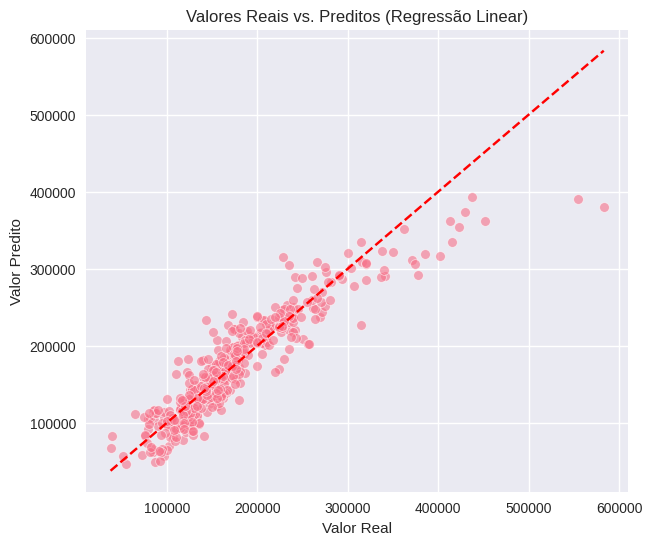

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_lin, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Valores Reais vs. Preditos (Regressão Linear)')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.show()

## 5.3 Árvore de Regressão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg_arvore = DecisionTreeRegressor(random_state=49, max_depth=8)
reg_arvore.fit(X_train, y_train)
y_pred_arv = reg_arvore.predict(X_test)

In [ ]:
print(f'R²: {r2_score(y_test, y_pred_arv)}')

R²: 0.6747064482723456


In [ ]:
reg_arvore_backup = DecisionTreeRegressor(random_state=49, max_depth=9)
reg_arvore_backup.fit(X_train_backup, Y_train_backup)
y_pred_arv_backup = reg_arvore_backup.predict(X_test_backup)

In [ ]:
print(f'R²: {r2_score(Y_test_backup, y_pred_arv_backup)}')

R²: 0.6829891907482378


Árvores de regressão únicas não são boas para o problema apresentado. Os melhores resultados foram de pouco mais de 67% de fit, utilizando árvores muito profundas, sem representação gráfica que seja legível. Comparando o R² da árvore e da regressão linear, pode-se entender que o relacionamento entre as variaveis é fortemente linear (observável, também, no grafico presente em 2.1.5).

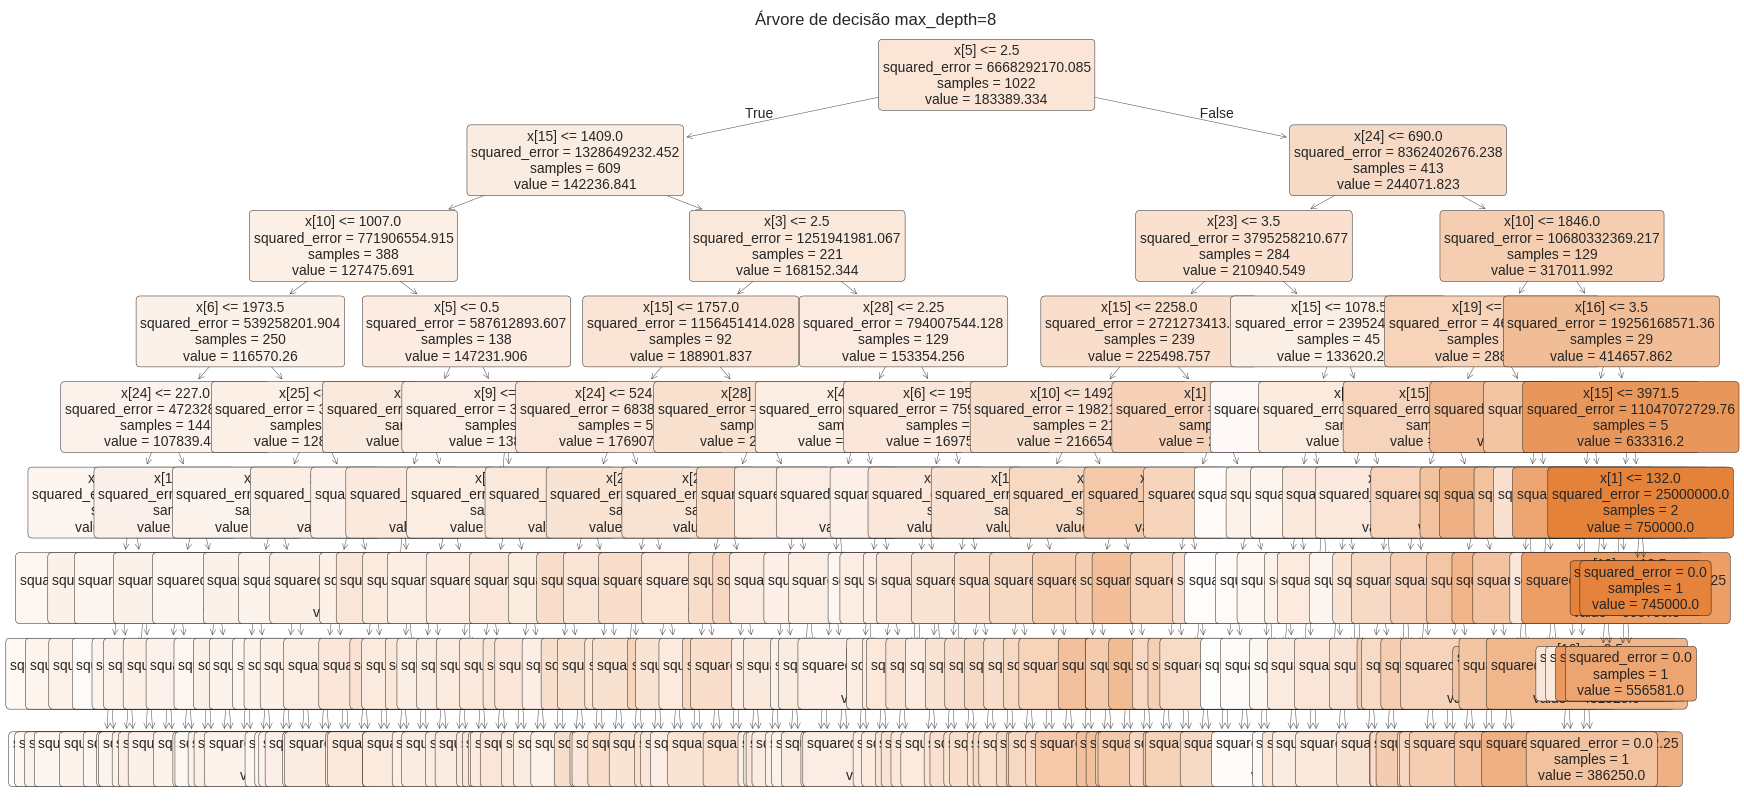

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(reg_arvore, filled=True, rounded=True, fontsize=10)
plt.title("Árvore de decisão max_depth=8")
plt.show()

## 5.3 Random Forest

A vantagem de usar modelos Random Forest, além de seus resultados melhores do que de árvores individuais, é que eles possuem, nativamente, formas de avaliar o impacto dos atributos na predição.

Random Forest Results
RMSE: 26491.84
R²: 0.870 (87.04%)


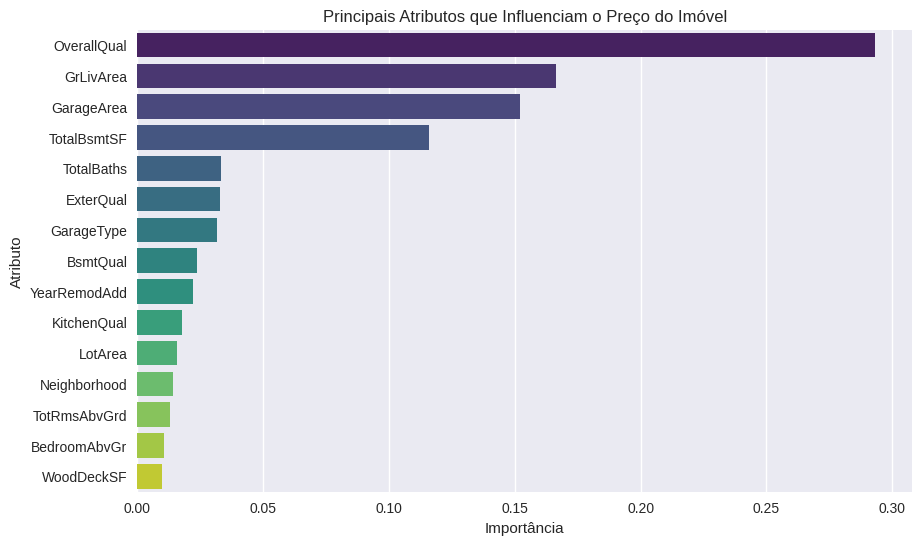




Random Forest Results
RMSE: 26221.49
R²: 0.873 (87.30%)


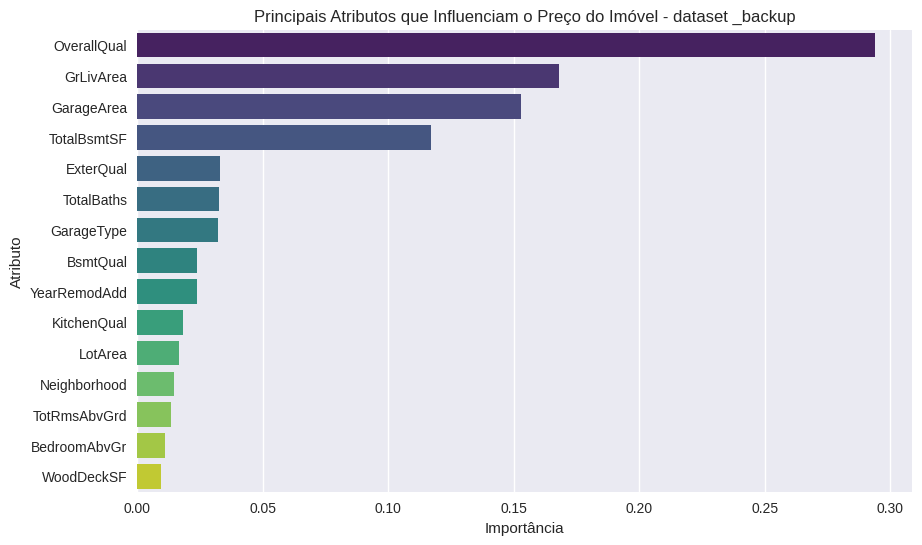

In [ ]:
# ====================================================
# Modelo Random Forest
# ====================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Treinamento do modelo Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=49,
    n_jobs=-1
)

'''
n_estimators=200: num árvores na floresta. Mais árvores geralmente aumentam a precisão, mas também o tempo de treino.
max_depth=8: profundidade máxima de cada árvore. Limitar a profundidade ajuda a evitar overfitting (o modelo se ajustar demais aos dados de treino).
random_state=49: garante reprodutibilidade, ou seja, resultados consistentes entre execuções.
n_jobs=-1: usa todos os núcleos do processador para treinar mais rápido
'''

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliação do modelo
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.3f} ({r2_rf*100:.2f}%)")

# ====================================================
# Importância dos Atributos (Feature Importance)
# ====================================================

importances = pd.Series(rf_model.feature_importances_, index=X_train.columns) # rf_model.feature_importances_ retorna a importância de cada variável no modelo (quanto cada uma contribui para as previsões)
importances = importances.sort_values(ascending=False).head(15)


plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Principais Atributos que Influenciam o Preço do Imóvel")
plt.xlabel("Importância")
plt.ylabel("Atributo")
plt.show()
print('\n\n')

#backup
rf_model_backup = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=49,
    n_jobs=-1
)

rf_model_backup.fit(X_train_backup, Y_train_backup)
y_pred_rf_backup = rf_model_backup.predict(X_test_backup)

rmse_rf_backup = np.sqrt(mean_squared_error(Y_test_backup, y_pred_rf_backup))
r2_rf_backup = r2_score(Y_test_backup, y_pred_rf_backup)

print("Random Forest Results")
print(f"RMSE: {rmse_rf_backup:.2f}")
print(f"R²: {r2_rf_backup:.3f} ({r2_rf_backup*100:.2f}%)")

importances_backup = pd.Series(rf_model_backup.feature_importances_, index=X_train_backup.columns) # rf_model.feature_importances_ retorna a importância de cada variável no modelo (quanto cada uma contribui para as previsões)
importances_backup = importances_backup.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=importances_backup, y=importances_backup.index, palette="viridis")
plt.title("Principais Atributos que Influenciam o Preço do Imóvel - dataset _backup")
plt.xlabel("Importância")
plt.ylabel("Atributo")
plt.show()
print('\n\n')

Comparação das importances dos modelos de random forest:
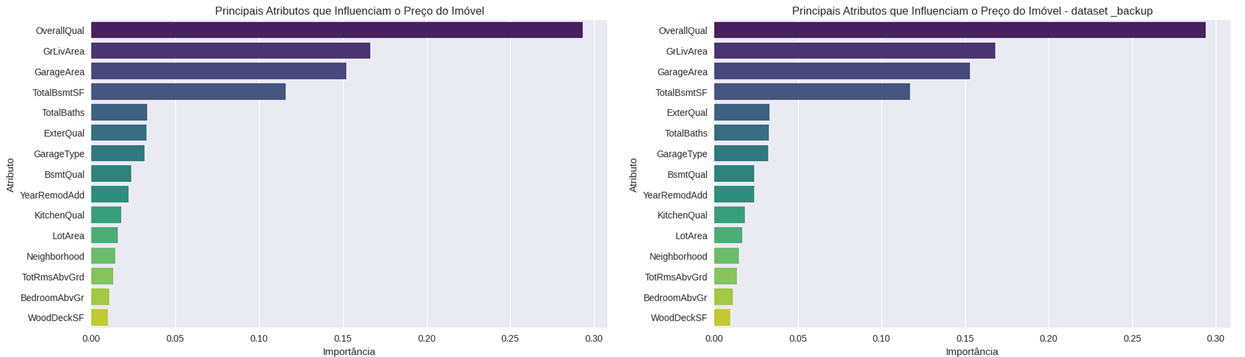

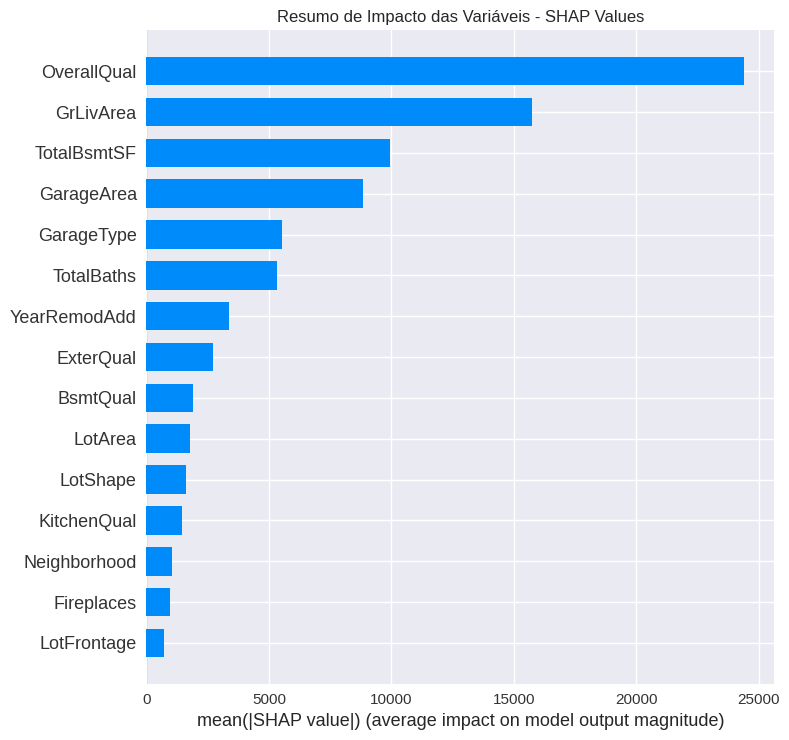

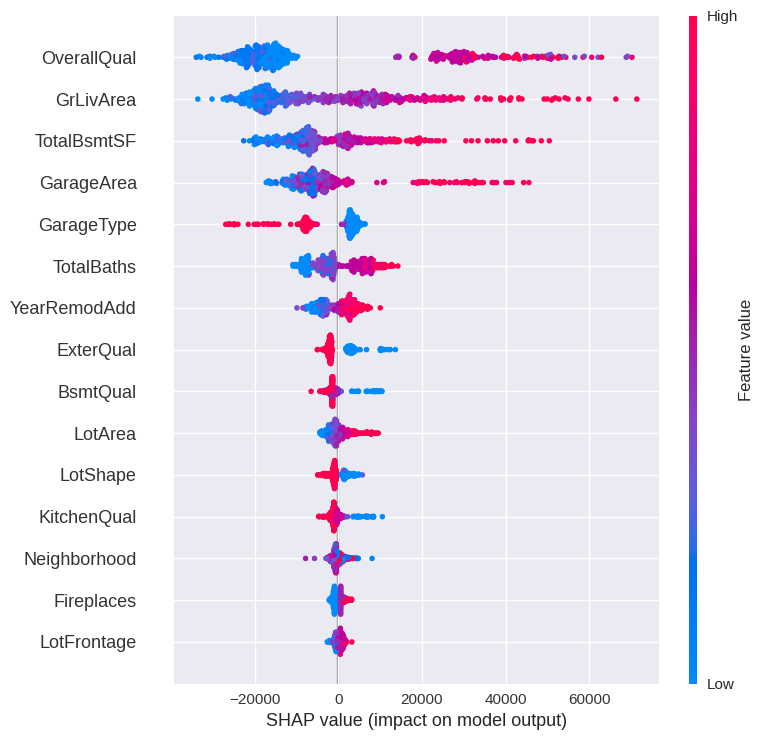

In [ ]:
# ====================================================
# Interpretabilidade com SHAP
# ====================================================

import shap

# Cria o objeto SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test) # mostra o impacto de cada variável sobre cada previsão.

# Gráfico de resumo (impacto médio de cada feature)
plt.title("Resumo de Impacto das Variáveis - SHAP Values")
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15)
print('\n\n')

# Gráfico detalhado (distribuição de impacto por variável)
shap.summary_plot(shap_values, X_test, max_display=15)

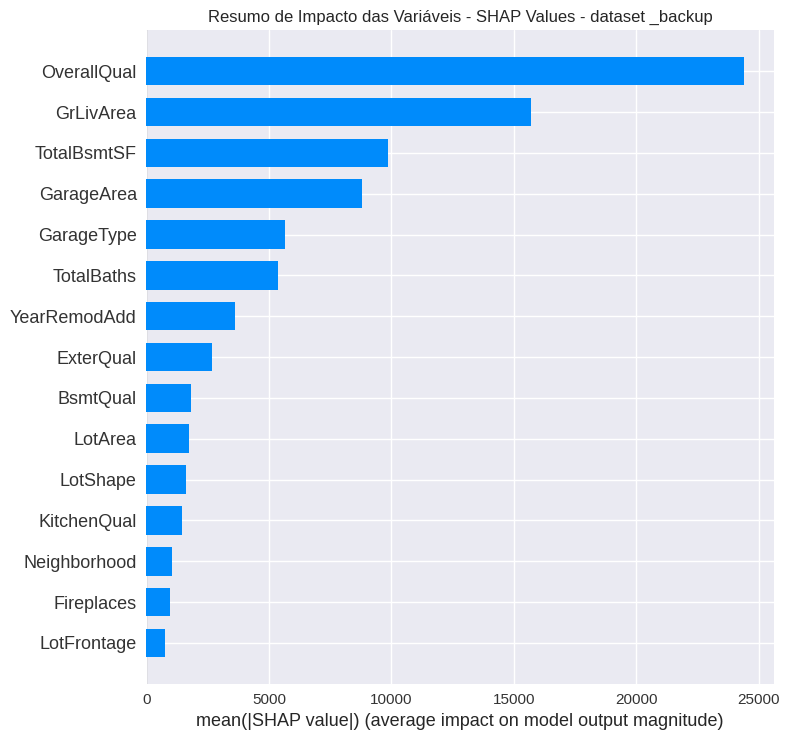

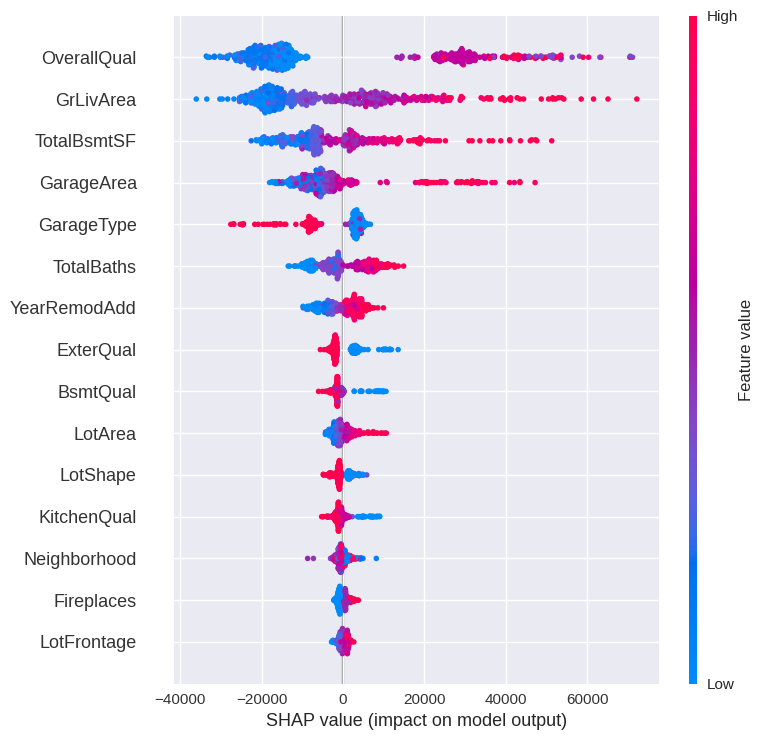

In [ ]:
explainer_backup = shap.TreeExplainer(rf_model_backup)
shap_values_backup = explainer_backup.shap_values(X_test_backup) # mostra o impacto de cada variável sobre cada previsão.

# Gráfico de resumo (impacto médio de cada feature)
plt.title("Resumo de Impacto das Variáveis - SHAP Values - dataset _backup")
shap.summary_plot(shap_values_backup, X_test_backup, plot_type="bar", max_display=15)
print('\n\n')

# Gráfico detalhado (distribuição de impacto por variável)
shap.summary_plot(shap_values_backup, X_test_backup, max_display=15)

Comparação dos resultados do SHAP:
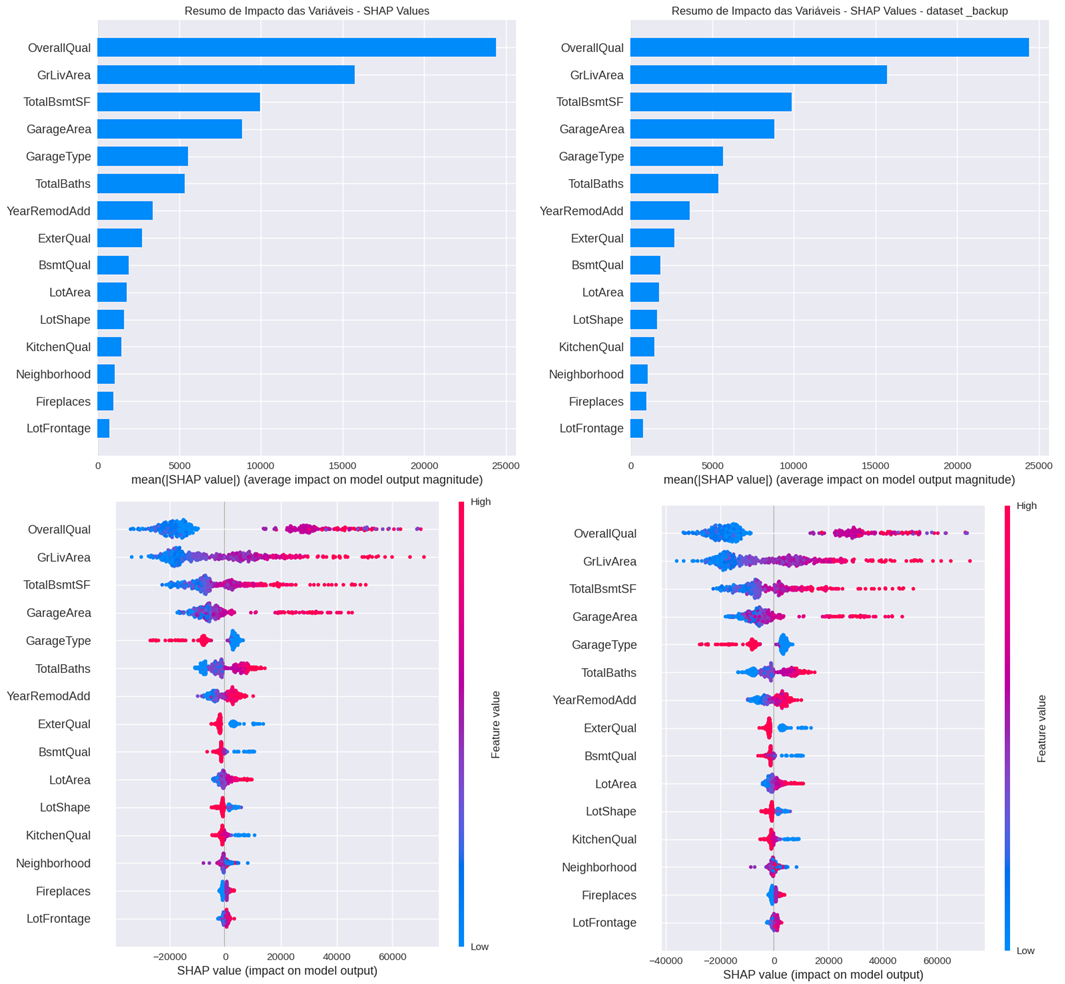

## 5.4 XGBoost

O XGBoost (eXtreme Gradient Boosting) é uma biblioteca de aprendizado de máquina distribuída e de código aberto que utiliza árvores de decisão com reforço gradativo, um algoritmo de aprendizado supervisionado que faz uso do Gradient Descent.

XGBoost Results
RMSE: 22710.63
R²: 0.905 (90.48%)


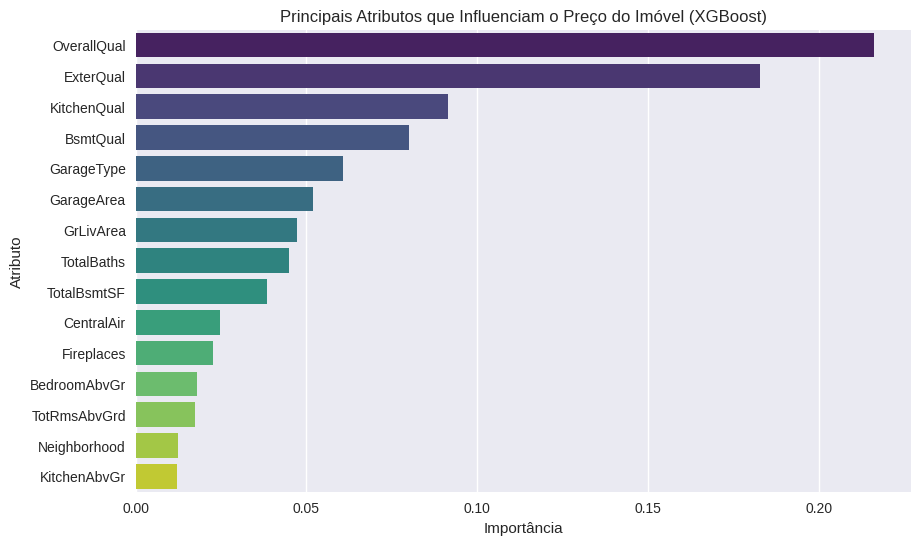




XGBoost Results
RMSE: 23280.93
R²: 0.900 (89.99%)


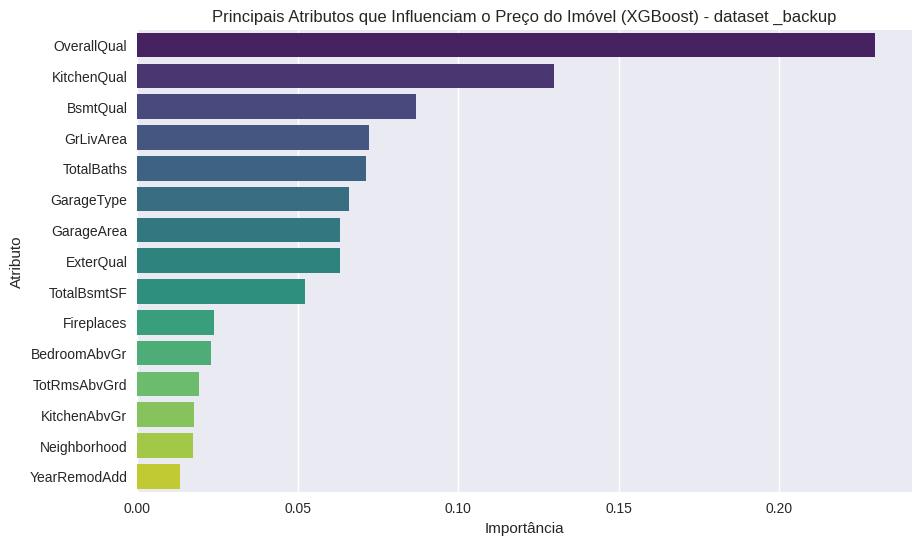

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Treinamento do modelo XGBoost

'''
XGBoost Results
RMSE: 28224.79
R²: 0.853 (85.29%)

xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.05,
    random_state=49,
    n_jobs=-1
)
'''

'''
XGBRegressor: É o modelo de regressão do XGBoost.
Parâmetros:
n_estimators=200: O número de árvores (como no Random Forest).
max_depth=8: Limita a profundidade das árvores, para evitar overfitting.
learning_rate=0.05: Taxa de aprendizado, que controla o quanto cada árvore "corrige" as anteriores. Valores menores tendem a dar um modelo mais robusto, mas exigem mais árvores.
n_jobs=-1: Usa todos os núcleos do processador para acelerar o treinamento.
'''

xgb_model = xgb.XGBRegressor(
    n_estimators=1000,       # mais árvores
    learning_rate=0.03,      # menor taxa de aprendizado
    max_depth=6,             # árvores mais rasas
    subsample=0.8,           # amostra parcial de linhas
    colsample_bytree=0.8,    # amostra parcial de colunas
    reg_lambda=1.0,          # regularização L2
    random_state=49,
    n_jobs=-1
)

'''
XGBoost Results
RMSE: 23480.02
R²: 0.898 (89.82%)
'''

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação do modelo
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R²: {r2_xgb:.3f} ({r2_xgb*100:.2f}%)")

# ====================================================
# Importância dos Atributos com XGBoost
# ====================================================
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
importances_xgb = importances_xgb.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=importances_xgb, y=importances_xgb.index, palette="viridis")
plt.title("Principais Atributos que Influenciam o Preço do Imóvel (XGBoost)")
plt.xlabel("Importância")
plt.ylabel("Atributo")
plt.show()
print('\n\n')

#backup
xgb_model_backup = xgb.XGBRegressor(
    n_estimators=1000,       # mais árvores
    learning_rate=0.03,      # menor taxa de aprendizado
    max_depth=6,             # árvores mais rasas
    subsample=0.8,           # amostra parcial de linhas
    colsample_bytree=0.8,    # amostra parcial de colunas
    reg_lambda=1.0,          # regularização L2
    random_state=49,
    n_jobs=-1
)

'''
XGBoost Results
RMSE: 23480.02
R²: 0.898 (89.82%)
'''

xgb_model_backup.fit(X_train_backup, Y_train_backup)
y_pred_xgb_backup = xgb_model_backup.predict(X_test_backup)

# Avaliação do modelo
rmse_xgb_backup = np.sqrt(mean_squared_error(Y_test_backup, y_pred_xgb_backup))
r2_xgb_backup = r2_score(Y_test_backup, y_pred_xgb_backup)

print("XGBoost Results")
print(f"RMSE: {rmse_xgb_backup:.2f}")
print(f"R²: {r2_xgb_backup:.3f} ({r2_xgb_backup*100:.2f}%)")

# ====================================================
# Importância dos Atributos com XGBoost
# ====================================================
importances_xgb_backup = pd.Series(xgb_model_backup.feature_importances_, index=X_train_backup.columns)
importances_xgb_backup = importances_xgb_backup.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=importances_xgb_backup, y=importances_xgb_backup.index, palette="viridis")
plt.title("Principais Atributos que Influenciam o Preço do Imóvel (XGBoost) - dataset _backup")
plt.xlabel("Importância")
plt.ylabel("Atributo")
plt.show()
print('\n\n')




Comparação dos resultados do XGBoost:
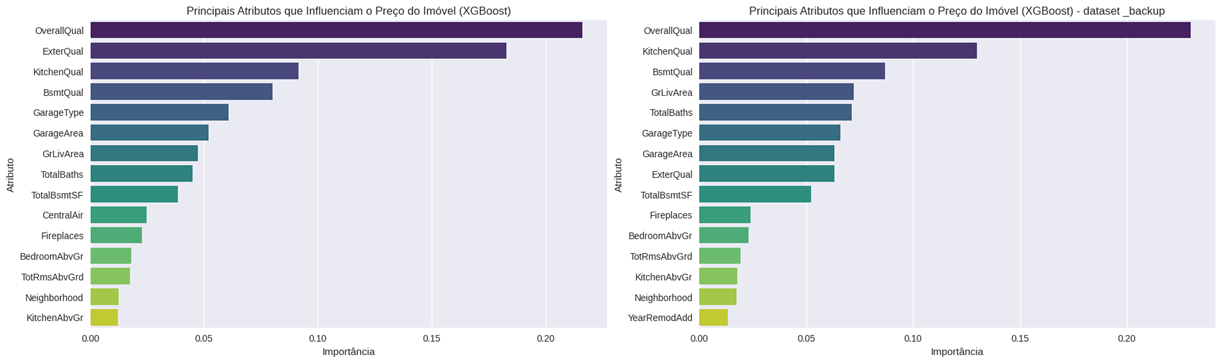

# 6 Análise Exploratória de Dados Avançada (EDA)

---> “Segmentação de Perfis de Imóveis e Identificação dos Principais Fatores que Definem Seu Valor de Mercado”

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression


# Selecionar features relevantes
features_cluster = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'SalePrice']
df_cluster = df_train[features_cluster].dropna()

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster.drop(columns=['SalePrice']))

# Aplicar K-Means (3 clusters: popular, médio, luxo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Nomear clusters com base na média de preço
cluster_mean = df_cluster.groupby('Cluster')['SalePrice'].mean().sort_values()
mapping = {cluster_mean.index[0]: 'Popular', cluster_mean.index[1]: 'Médio', cluster_mean.index[2]: 'Luxo'}
df_cluster['Perfil'] = df_cluster['Cluster'].map(mapping)

## 6.1 Visualização dos Clusters

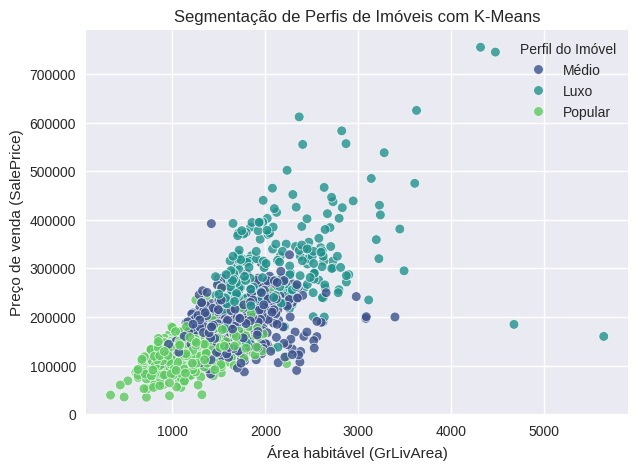

In [ ]:
# ====================================================
# Visualização dos Clusters
# ====================================================

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_cluster,
    x='GrLivArea', y='SalePrice',
    hue='Perfil', palette='viridis', alpha=0.8
)
plt.title("Segmentação de Perfis de Imóveis com K-Means")
plt.xlabel("Área habitável (GrLivArea)")
plt.ylabel("Preço de venda (SalePrice)")
plt.legend(title='Perfil do Imóvel')
plt.show()
print('\n')

## 6.2 Boxplot - Comparação de Preços entre Perfis

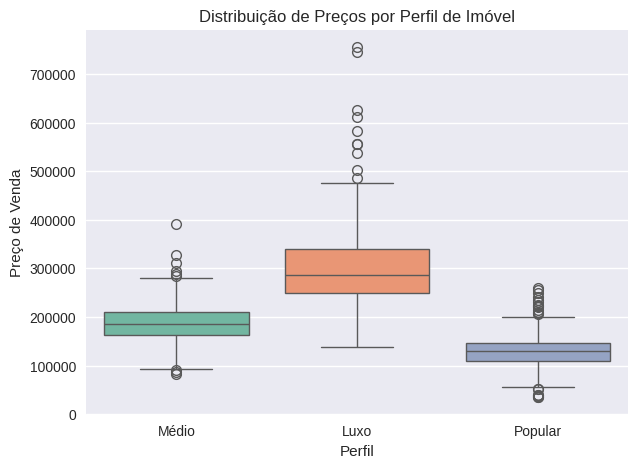

In [ ]:
# ====================================================
# Boxplot - Comparação de Preços entre Perfis
# ====================================================

plt.figure(figsize=(7,5))
sns.boxplot(data=df_cluster, x='Perfil', y='SalePrice', palette='Set2')
plt.title("Distribuição de Preços por Perfil de Imóvel")
plt.xlabel("Perfil")
plt.ylabel("Preço de Venda")
plt.show()
print('\n')

## 6.3 Importância dos Atributos por Cluster (Regressão Linear local)

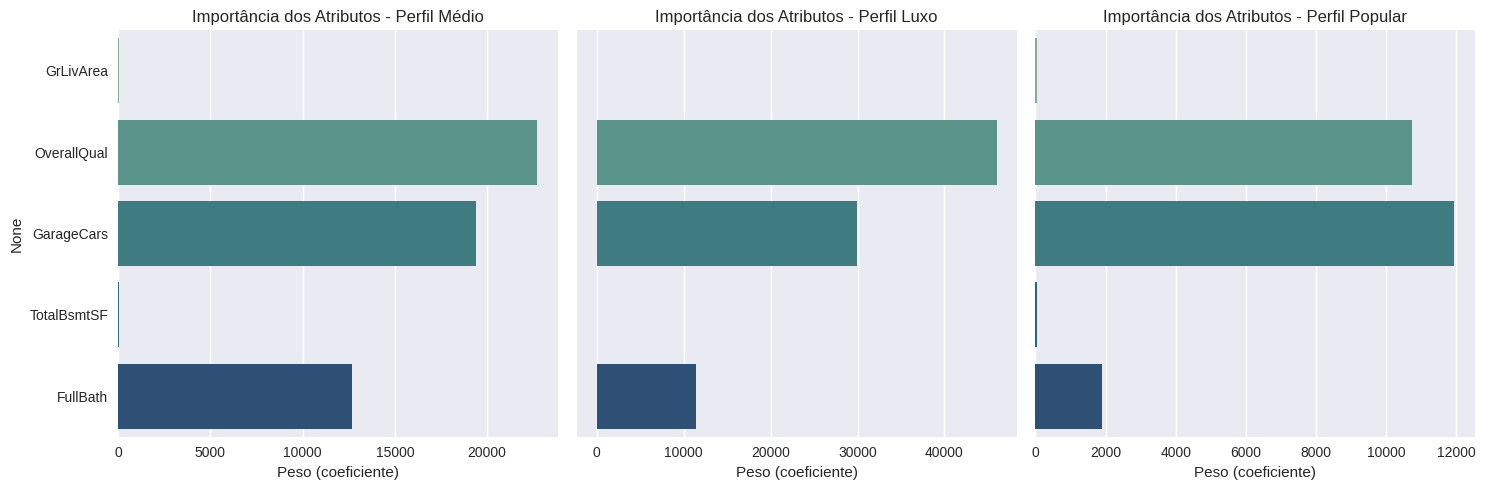

In [ ]:
# ==============================================================
# Importância dos Atributos por Cluster (Regressão Linear local)
# ==============================================================

importances = {}
for perfil in df_cluster['Perfil'].unique():
    subset = df_cluster[df_cluster['Perfil'] == perfil]
    X = subset[['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'FullBath']]
    y = subset['SalePrice']
    model = LinearRegression()
    model.fit(X, y)
    importances[perfil] = pd.Series(model.coef_, index=X.columns)

# Plot das importâncias
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
for i, perfil in enumerate(importances.keys()):
    sns.barplot(x=importances[perfil].values, y=importances[perfil].index, ax=ax[i], palette='crest')
    ax[i].set_title(f'Importância dos Atributos - Perfil {perfil}')
    ax[i].set_xlabel('Peso (coeficiente)')
plt.tight_layout()
plt.show()
print('\n')

## 6.4 Heatmap de Correlação por Perfil

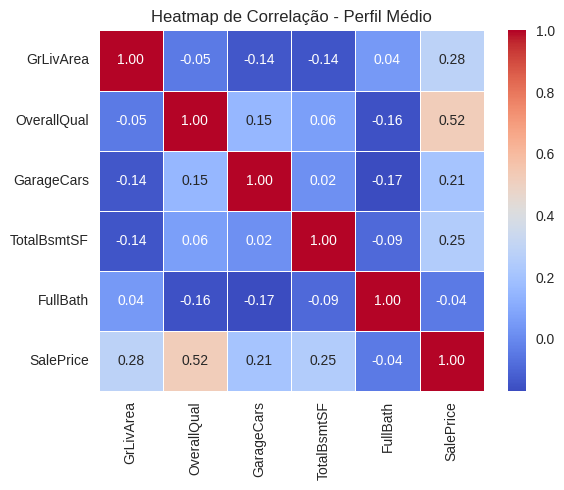

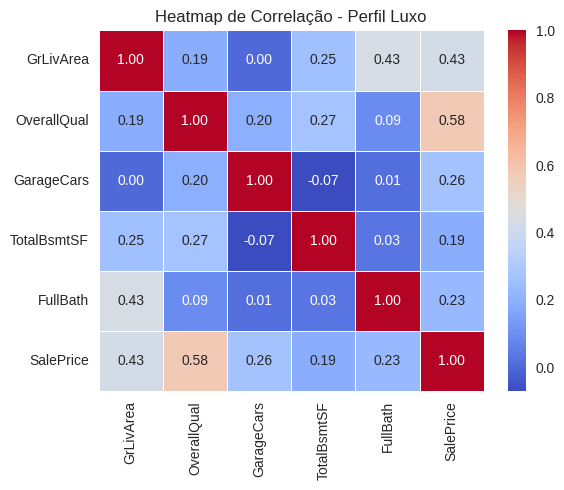

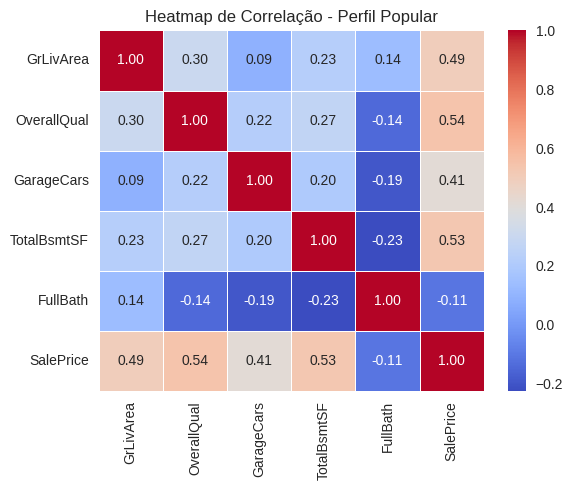

In [ ]:
# ====================================================
# Heatmap de Correlação por Perfil
# ====================================================

for perfil in df_cluster['Perfil'].unique():
    corr = (
        df_cluster[df_cluster['Perfil'] == perfil]
        .drop(columns=['Cluster', 'Perfil'])
        .corr(numeric_only=True)
    )

    plt.figure(figsize=(6,5))
    sns.heatmap(
        corr,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        linewidths=.5
    )
    plt.title(f"Heatmap de Correlação - Perfil {perfil}", fontsize=12)
    plt.tight_layout()
    plt.show()
    print('\n')


## 6.5 Heatmap de Correlação SEM Perfil

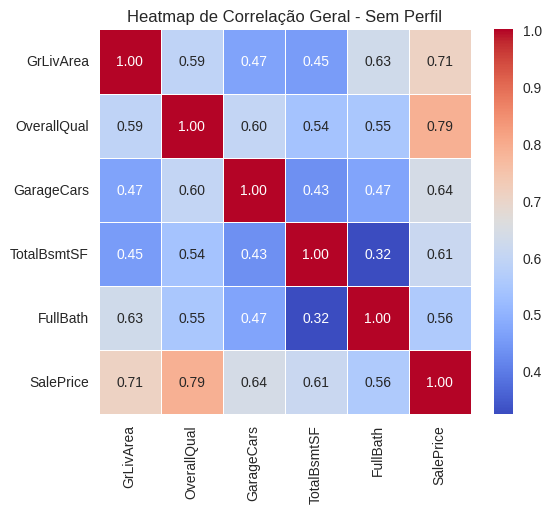

In [ ]:
# ====================================================
# Heatmap de Correlação sem Perfil
# ====================================================

cols_to_plot = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'SalePrice']
corr_matrix_foco = df_train[cols_to_plot].corr(numeric_only=True)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix_foco,annot=True,fmt=".2f",cmap='coolwarm',linewidths=.5)
plt.title('Heatmap de Correlação Geral - Sem Perfil', fontsize=12)
plt.show()

A análise dos heatmaps de correlação confirma o comportamento esperado para o perfil "Luxo", com fortes relações entre as variáveis GrLivArea e OverallQual em relação ao SalePrice. No entanto, o principal insight é que os imóveis desse perfil já seguem um padrão bem definido — caracterizado por áreas amplas, alto padrão construtivo, número elevado de quartos e terrenos maiores. Esses fatores, recorrentes em propriedades de luxo, acabam reduzindo a variabilidade entre as amostras e explicam o comportamento mais estável das correlações observadas.